### Project Objective: Predicting Telecom Customer Churn

#### Business Problem Overview:
In the dynamic telecom sector, customers wield significant power as they can easily switch between service providers. With annual churn rates averaging between 15-25%, competition in the industry is fierce. Recognizing that acquiring new customers is substantially more costly—typically 5-10 times more—than retaining existing ones, telecom companies are prioritizing customer retention over acquisition.

Retaining high-value customers, who contribute significantly to revenue, has emerged as the primary business objective for many established operators. In this fiercely competitive landscape, where customer loyalty is paramount, maintaining a loyal customer base is vital for sustained profitability and market success. 

![Telecom Customer Churn](https://miro.medium.com/v2/resize:fit:720/format:webp/0*8Iu_eymr6eR-YuQw)

#### Understanding Churn:
Churn, defined as customers switching to other operators, poses a unique challenge in the telecom landscape. While postpaid customers typically notify their current provider before switching, prepaid customers may silently discontinue services, complicating churn prediction. In this project, churn will be defined based on usage patterns.

#### High-Value Churn:
In markets like India and Southeast Asia, 80% of telecom revenue comes from the top 20% of customers. Reducing churn among these high-value customers is crucial for revenue retention. This project focuses on predicting churn among high-value customers based on usage data.

#### Data Preparation:
1. Derive new features relevant to churn prediction.
2. Define high-value customers as those with recharge amounts above a certain threshold.
3. Tag churners based on usage patterns in the churn phase and remove corresponding attributes.

#### Modelling:
1. Build predictive models to identify churn among high-value customers.
2. Utilize dimensionality reduction techniques like PCA to handle large feature sets.
3. Handle class imbalance using appropriate techniques.
4. Train various models, tune hyperparameters, and select the best model based on evaluation metrics.
5. Build additional models to identify important predictor attributes for churn.

#### Recommendations:
Based on model insights, recommend strategies to manage customer churn effectively, aiding telecom companies in retaining their high-value customer base.

#### Deliverables:
All project components, including data preprocessing, exploratory analysis, model building, evaluation, and recommendations, will be encapsulated within a single Jupyter notebook.


| Acronyms      | Descriptions                                                                                      |
|---------------|---------------------------------------------------------------------------------------------------|
| MOBILE_NUMBER | Customer phone number                                                                             |
| CIRCLE_ID     | Telecom circle area to which the customer belongs to                                              |
| LOC           | Local calls - within the same telecom circle                                                       |
| STD           | STD calls - outside the calling circle                                                             |
| IC            | Incoming calls                                                                                    |
| OG            | Outgoing calls                                                                                    |
| T2T           | Operator T to T, i.e. within the same operator (mobile to mobile)                                  |
| T2M           | Operator T to other operator mobile                                                               |
| T2O           | Operator T to other operator fixed line                                                            |
| T2F           | Operator T to fixed lines of T                                                                     |
| T2C           | Operator T to its own call center                                                                  |
| ARPU          | Average revenue per user                                                                          |
| MOU           | Minutes of usage - voice calls                                                                    |
| AON           | Age on network - number of days the customer is using the operator T network                       |
| ONNET         | All kinds of calls within the same operator network                                               |
| OFFNET        | All kinds of calls outside the operator T network                                                  |
| ROAM          | Indicates that the customer is in a roaming zone during the call                                    |
| SPL           | Special calls                                                                                     |
| ISD           | ISD calls                                                                                         |
| RECH          | Recharge                                                                                          |
| NUM           | Number                                                                                            |
| AMT           | Amount in local currency                                                                          |
| MAX           | Maximum                                                                                           |
| DATA          | Mobile internet                                                                                   |
| 3G            | 3G network                                                                                        |
| AV            | Average                                                                                           |
| VOL           | Mobile internet usage volume (in MB)                                                              |
| 2G            | 2G network                                                                                        |
| PCK           | Prepaid service schemes called - PACKS                                                            |
| NIGHT         | Scheme to use during specific night hours only                                                    |
| MONTHLY       | Service schemes with validity equivalent to a month                                                |
| SACHET        | Service schemes with validity smaller than a month                                                  |
| *.6           | KPI for the month of June                                                                         |
| *.7           | KPI for the month of July                                                                         |
| *.8           | KPI for the month of August                                                                       |
| *.9           | KPI for the month of September                                                                    |
| FB_USER       | Service scheme to avail services of Facebook and similar social networking sites                    |
| VBC           | Volume-based cost - when no specific scheme is not purchased and paid as per usage                 |


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import math

import warnings
warnings.filterwarnings("ignore")


# Setting pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
tel_churn_df= pd.read_csv("telecom_churn_data.csv")

In [3]:
tel_churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
tel_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


- **RangeIndex**: 99999 entries, 0 to 99998: This tells you that the DataFrame has 99999 entries (rows), indexed from 0 to 99998. It's a RangeIndex, meaning it's a default index generated by pandas.

- **Columns**: 226 entries, mobile_number to sep_vbc_3g: There are 226 columns in the DataFrame, ranging from 'mobile_number' to 'sep_vbc_3g'.

- **dtypes**: float64(179), int64(35), object(12): This section shows the data types of each column. There are 179 columns with float64 (floating-point numbers), 35 columns with int64 (integer numbers), and 12 columns with object (usually strings).

In [5]:
tel_churn_df.describe(include="all")

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [6]:
tel_churn_df.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [7]:
null_columns= tel_churn_df.columns[tel_churn_df.isnull().sum()>0]
null_columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       ...
       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'fb_user_9'],
      dtype='object', length=166)

In [8]:
len(null_columns)

166

In [9]:
null_values_sum = tel_churn_df.isnull().sum()[null_columns]
null_values_sum

loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou_6             3937
loc_og_t2t_mou_7             3859
loc_og_t2t_mou_8             5378
loc_og_t2t_mou_9             7745
loc_og_t2m_mou_6             3937
loc_og_t2m_mou_7             3859
loc_og_t2m_mou_8             5378
loc_og_t2m_mou

In [10]:
null_values_percentage = (null_values_sum / len(tel_churn_df)) * 100

In [11]:
null_values_percentage

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_m

In [12]:
# Total number of rows
total_rows = len(tel_churn_df)

# Calculate the percentage of null values for each column
null_values_percentage = {}

for col in null_columns:
    count = tel_churn_df[col].isnull().sum()
    percentage = (count / total_rows) * 100
    null_values_percentage[col] = percentage

# Sort the dictionary by values (percentage of null values) in ascending order
sorted_null_values_percentage = dict(sorted(null_values_percentage.items(), key=lambda item: item[1]))

# Display the percentage of null values for each column in ascending order
for col, percentage in sorted_null_values_percentage.items():
    print(f"Column '{col}' has {percentage:.2f}% null values.")

Column 'last_date_of_month_7' has 0.60% null values.
Column 'loc_og_t2o_mou' has 1.02% null values.
Column 'std_og_t2o_mou' has 1.02% null values.
Column 'loc_ic_t2o_mou' has 1.02% null values.
Column 'last_date_of_month_8' has 1.10% null values.
Column 'date_of_last_rech_6' has 1.61% null values.
Column 'last_date_of_month_9' has 1.66% null values.
Column 'date_of_last_rech_7' has 1.77% null values.
Column 'date_of_last_rech_8' has 3.62% null values.
Column 'onnet_mou_7' has 3.86% null values.
Column 'offnet_mou_7' has 3.86% null values.
Column 'roam_ic_mou_7' has 3.86% null values.
Column 'roam_og_mou_7' has 3.86% null values.
Column 'loc_og_t2t_mou_7' has 3.86% null values.
Column 'loc_og_t2m_mou_7' has 3.86% null values.
Column 'loc_og_t2f_mou_7' has 3.86% null values.
Column 'loc_og_t2c_mou_7' has 3.86% null values.
Column 'loc_og_mou_7' has 3.86% null values.
Column 'std_og_t2t_mou_7' has 3.86% null values.
Column 'std_og_t2m_mou_7' has 3.86% null values.
Column 'std_og_t2f_mou_7

In [13]:
null_columns.unique()

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       ...
       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'fb_user_9'],
      dtype='object', length=166)

In [14]:
unique_value_counts = {}
for col in null_columns:
    unique_value_counts[col] = tel_churn_df[col].nunique()

# Display the number of unique values for each column
for col, count in unique_value_counts.items():
    print(f"Column '{col}' has {count} unique values.")

Column 'loc_og_t2o_mou' has 1 unique values.
Column 'std_og_t2o_mou' has 1 unique values.
Column 'loc_ic_t2o_mou' has 1 unique values.
Column 'last_date_of_month_7' has 1 unique values.
Column 'last_date_of_month_8' has 1 unique values.
Column 'last_date_of_month_9' has 1 unique values.
Column 'onnet_mou_6' has 24313 unique values.
Column 'onnet_mou_7' has 24336 unique values.
Column 'onnet_mou_8' has 24089 unique values.
Column 'onnet_mou_9' has 23565 unique values.
Column 'offnet_mou_6' has 31140 unique values.
Column 'offnet_mou_7' has 31023 unique values.
Column 'offnet_mou_8' has 30908 unique values.
Column 'offnet_mou_9' has 30077 unique values.
Column 'roam_ic_mou_6' has 6512 unique values.
Column 'roam_ic_mou_7' has 5230 unique values.
Column 'roam_ic_mou_8' has 5315 unique values.
Column 'roam_ic_mou_9' has 4827 unique values.
Column 'roam_og_mou_6' has 8038 unique values.
Column 'roam_og_mou_7' has 6639 unique values.
Column 'roam_og_mou_8' has 6504 unique values.
Column 'roa

- Columns with only one unique value don't provide meaningful information for analysis because they remain constant throughout the dataset and don't add variability. so we can **drop** those coloums .
 **columns=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']**

In [15]:
# Filter out columns with only one unique value
columns_with_single_unique_value = [col for col, count in unique_value_counts.items() if count == 1]

# Display the columns with only one unique value
print("Columns with only one unique value:")
for col in columns_with_single_unique_value:
    print(col)

Columns with only one unique value:
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
std_ic_t2o_mou_9


In [16]:
for col in columns_with_single_unique_value:
    unique_value = tel_churn_df[col].unique()
    print(f"Column '{col}' has unique value(s): {unique_value}")

Column 'loc_og_t2o_mou' has unique value(s): [ 0. nan]
Column 'std_og_t2o_mou' has unique value(s): [ 0. nan]
Column 'loc_ic_t2o_mou' has unique value(s): [ 0. nan]
Column 'last_date_of_month_7' has unique value(s): ['7/31/2014' nan]
Column 'last_date_of_month_8' has unique value(s): ['8/31/2014' nan]
Column 'last_date_of_month_9' has unique value(s): ['9/30/2014' nan]
Column 'std_og_t2c_mou_6' has unique value(s): [nan  0.]
Column 'std_og_t2c_mou_7' has unique value(s): [nan  0.]
Column 'std_og_t2c_mou_8' has unique value(s): [ 0. nan]
Column 'std_og_t2c_mou_9' has unique value(s): [nan  0.]
Column 'std_ic_t2o_mou_6' has unique value(s): [nan  0.]
Column 'std_ic_t2o_mou_7' has unique value(s): [nan  0.]
Column 'std_ic_t2o_mou_8' has unique value(s): [ 0. nan]
Column 'std_ic_t2o_mou_9' has unique value(s): [nan  0.]


- 'loc_og_t2o_mou', 'std_og_t2o_mou', and 'loc_ic_t2o_mou' represent technical identifiers or flags that are not useful for our analysis

- last_date_of_month_7', 'last_date_of_month_8', and 'last_date_of_month_9' might be important for analyzing time-based trends or patterns

tel_churn_df.drop(columns=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9'], inplace=True)

**coloums are having 2 null values**

In [17]:
columns_with_two_unique_values = [
    'std_og_t2c_mou_6',
    'std_og_t2c_mou_7',
    'std_og_t2c_mou_8',
    'std_og_t2c_mou_9',
    'night_pck_user_6',
    'night_pck_user_7',
    'night_pck_user_8',
    'night_pck_user_9',
    'fb_user_6',
    'fb_user_7',
    'fb_user_8',
    'fb_user_9'
]


for col in columns_with_two_unique_values:
    unique_value = tel_churn_df[col].unique()
    print(f"Column '{col}' has unique value(s): {unique_value}")

Column 'std_og_t2c_mou_6' has unique value(s): [nan  0.]
Column 'std_og_t2c_mou_7' has unique value(s): [nan  0.]
Column 'std_og_t2c_mou_8' has unique value(s): [ 0. nan]
Column 'std_og_t2c_mou_9' has unique value(s): [nan  0.]
Column 'night_pck_user_6' has unique value(s): [ 0. nan  1.]
Column 'night_pck_user_7' has unique value(s): [ 0. nan  1.]
Column 'night_pck_user_8' has unique value(s): [ 0. nan  1.]
Column 'night_pck_user_9' has unique value(s): [nan  0.  1.]
Column 'fb_user_6' has unique value(s): [ 1. nan  0.]
Column 'fb_user_7' has unique value(s): [ 1. nan  0.]
Column 'fb_user_8' has unique value(s): [ 1. nan  0.]
Column 'fb_user_9' has unique value(s): [nan  1.  0.]


- Understanding the intricacies of this data can be challenging with its sheer volume and complexity. However, fear not! We have a powerful tool at our disposal: metadata. By harnessing the power of metadata, we can delve deeper into the dataset, unraveling its mysteries and gaining profound insights that might otherwise remain hidden. Let's embark on this journey together and unlock the secrets that lie within the data!

In [18]:
# Checking information about data.
print(tel_churn_df.info())
def metadata_matrix(tel_churn_df) : 
    return pd.DataFrame({
                'Datatype' : tel_churn_df.dtypes.astype(str), 
                'Non_Null_Count': tel_churn_df.count(axis = 0).astype(int), 
                'Null_Count': tel_churn_df.isnull().sum().astype(int), 
                'Null_Percentage': round(tel_churn_df.isnull().sum()/len(tel_churn_df) * 100 , 2), 
                'Unique_Values_Count': tel_churn_df.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(tel_churn_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.85,7418
night_pck_user_6,float64,25153,74846,74.85,2
total_rech_data_6,float64,25153,74846,74.85,37
arpu_2g_6,float64,25153,74846,74.85,6990
max_rech_data_6,float64,25153,74846,74.85,48
fb_user_6,float64,25153,74846,74.85,2
av_rech_amt_data_6,float64,25153,74846,74.85,887
date_of_last_rech_data_6,object,25153,74846,74.85,30
count_rech_2g_6,float64,25153,74846,74.85,31
count_rech_3g_6,float64,25153,74846,74.85,25


In [19]:
def metadata_matrix(tel_churn_df) : 
    return pd.DataFrame({
                'Datatype' : tel_churn_df.dtypes.astype(str), 
                'Non_Null_Count': tel_churn_df.count(axis = 0).astype(int), 
                'Null_Count': tel_churn_df.isnull().sum().astype(int), 
                'Null_Percentage': round(tel_churn_df.isnull().sum()/len(tel_churn_df) * 100 , 2), 
                'Unique_Values_Count': tel_churn_df.nunique().astype(int) 
                 }).sort_values(by='Unique_Values_Count', ascending=True)

metadata_matrix(tel_churn_df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2o_mou_6,float64,96062,3937,3.94,1
std_og_t2c_mou_8,float64,94621,5378,5.38,1
std_og_t2c_mou_9,float64,92254,7745,7.75,1
std_ic_t2o_mou_9,float64,92254,7745,7.75,1
std_ic_t2o_mou_8,float64,94621,5378,5.38,1
std_og_t2c_mou_7,float64,96140,3859,3.86,1
std_ic_t2o_mou_7,float64,96140,3859,3.86,1
last_date_of_month_9,object,98340,1659,1.66,1
std_og_t2c_mou_6,float64,96062,3937,3.94,1
last_date_of_month_7,object,99398,601,0.60,1


### Data Cleaning 

- Since number of rows is same as distinct mobile numbers, there is no duplicate data


In [20]:
# mobile_number is a unique identifier 
# Setting mobile_number as the index 
tel_churn_df = tel_churn_df.set_index('mobile_number')

In [21]:
# Renaming columns 
tel_churn_df = tel_churn_df.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

In [22]:
#Changing datatype of date variables to datetime.
columns=tel_churn_df.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
tel_churn_df[col_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [23]:
# Checking the date format
tel_churn_df[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
7001865778,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
7001625959,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
7001204172,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
7000142493,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


- **Let's convert the mentioned columns to the datetime data type.**

In [24]:
for col in col_with_date:
    tel_churn_df[col]=pd.to_datetime(tel_churn_df[col], format="%m/%d/%Y")
tel_churn_df[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
7001865778,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
7001625959,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
7001204172,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
7000142493,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT


Before dropping any **null value** columns, let's first analyze the customer data and segment them into high and low-value customers. Next, we'll compare these segments with the columns containing null values to gain a better understanding of the data. This approach will help us make informed decisions about how to handle null values and potentially other preprocessing steps.

### Filter High Value Customers

#### Columns for Analyzing High and Low-Value Customers:

1. **MOBILE_NUMBER**: Customer phone number (to uniquely identify customers)
2. **ARPU**: Average revenue per user (an important metric to identify high-value customers)
3. **MOU**: Minutes of usage - voice calls (can indicate customer engagement)
4. **AON**: Age on network - number of days the customer is using the operator's network (can indicate customer loyalty)
5. **ONNET**: All kinds of calls within the same operator network
6. **OFFNET**: All kinds of calls outside the operator's network
7. **ROAM**: Indicates that the customer is in a roaming zone during the call
8. **DATA**: Mobile internet usage (2G, 3G) volume in MB
9. **FB_USER**: Service scheme to avail services of Facebook and similar social networking sites (can indicate customer preferences)

These columns provide valuable insights into customer behavior, usage patterns, and revenue generation, which can be used to segment customers into high and low-value categories. Analyzing these columns along with additional demographic and usage data can help in identifying high and low-value customers effectively.


In [25]:
all_columns = tel_churn_df.columns.tolist()

rech_col = [col for col in all_columns if 'rech' in col]
rech_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

### Alternative Approaches to Identify High-Value Customers

1. **Clustering Analysis:**
   - Use clustering algorithms such as K-means or hierarchical clustering to segment customers based on their recharge behavior.
   - Features used for clustering can include total recharge amount, average recharge amount, frequency of recharges, etc.
   - Identify clusters that represent high-value customers based on their spending patterns.

2. **Predictive Modeling:**
   - Build predictive models, such as logistic regression or random forest, to predict whether a customer will churn or not.
   - Use features related to recharge behavior (e.g., total recharge amount, recharge frequency, etc.) as input variables.
   - High-value customers can be identified as those with a lower likelihood of churn predicted by the model.

3. **RFM Analysis:**
   - Perform RFM (Recency, Frequency, Monetary) analysis to segment customers based on their transaction history.
   - Recency: How recently did the customer recharge?
   - Frequency: How often does the customer recharge?
   - Monetary: What is the total amount spent on recharges by the customer?
   - Identify customers with high RFM scores as high-value customers.

4. **Lifetime Value (LTV) Calculation:**
   - Calculate the lifetime value of customers by estimating their potential future revenue.
   - Use historical data on recharge behavior to predict future spending patterns.
   - Identify customers with a higher predicted lifetime value as high-value customers.

5. **Churn Prediction Ensemble:**
   - Build an ensemble of churn prediction models using various algorithms (e.g., logistic regression, decision trees, gradient boosting).
   - Features related to recharge behavior can be important predictors in these models.
   - Use ensemble techniques to combine predictions from multiple models and identify customers with a lower predicted churn probability as high-value customers.

6. **Segmentation Based on Recharge Amount Distribution:**
   - Segment customers based on the distribution of their recharge amounts.
   - For example, divide customers into quartiles or deciles based on their total recharge amounts.
   - Consider customers in the top quartile or decile as high-value customers.



### Approach: Lifetime Value (LTV) Calculation

**Reasoning:**
- **Advantages:** 
  - LTV calculation considers the potential future revenue of customers, which is essential for identifying high-value customers.
  - It takes into account both the total amount spent and the frequency of recharges, providing a comprehensive view of customer value.
- **Suitability:** 
  - Since you're interested in identifying high-value customers based on their recharge behavior, LTV calculation aligns well with this objective.
  - It leverages historical data on recharge behavior to predict future spending patterns, making it suitable for your scenario.

**Steps:**
1. Calculate the lifetime value of customers by estimating their potential future revenue.
2. Use historical data on recharge behavior to predict future spending patterns.
3. Identify customers with a higher predicted lifetime value as high-value customers.

**Implementation:**
- Calculate average recharge amount for June and July.
- Add any additional steps for LTV calculation and customer segmentation.



Customers are High Values if their Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount.

In [26]:
#Deriving Average recharge amount of June and July.
tel_churn_df['Average_rech_amt_6n7']=(tel_churn_df['total_rech_amt_6']+tel_churn_df['total_rech_amt_7'])/2

In [27]:
#Filtering based HIGH VALUED CUSTOMERS based on (Average_rech_amt_6n7 >= 70th percentile of Average_rech_amt_6n7)
tel_churn_df=tel_churn_df[(tel_churn_df['Average_rech_amt_6n7']>= tel_churn_df['Average_rech_amt_6n7'].quantile(0.7))]

**Recommendation:**
- Based on our requirement to identify high-value customers using recharge behavior, the LTV calculation approach seems to be the most appropriate. It provides a holistic view of customer value and considers both the total amount spent and the frequency of recharges.
- Implement the LTV calculation and customer segmentation steps to identify high-value customers effectively.


## Handle Missing Values

In [28]:
#Checking for missing values.
missing_values = metadata_matrix(tel_churn_df)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values

,Datatype,Null_Percentage
count_rech_2g_6,float64,62.02
total_rech_data_6,float64,62.02
fb_user_6,float64,62.02
count_rech_3g_6,float64,62.02
date_of_last_rech_data_6,datetime64[ns],62.02
arpu_2g_6,float64,62.02
arpu_3g_6,float64,62.02
night_pck_user_6,float64,62.02
av_rech_amt_data_6,float64,62.02
max_rech_data_6,float64,62.02


In [29]:
# Columns with high missing values , > 50%
metadata = metadata_matrix(tel_churn_df)
condition = metadata['Null_Percentage'] > 50 
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
fb_user_7,float64,11662,18349,61.14,2
fb_user_6,float64,11397,18614,62.02,2
night_pck_user_9,float64,11461,18550,61.81,2
night_pck_user_8,float64,11754,18257,60.83,2
night_pck_user_7,float64,11662,18349,61.14,2
fb_user_8,float64,11754,18257,60.83,2
fb_user_9,float64,11461,18550,61.81,2
night_pck_user_6,float64,11397,18614,62.02,2
count_rech_3g_6,float64,11397,18614,62.02,25
count_rech_3g_9,float64,11461,18550,61.81,27


In [30]:
# Dropping above columns with high missing values 
high_missing_value_columns = high_missing_values.index 
tel_churn_df.drop(columns=high_missing_value_columns, inplace=True)

In [31]:
# Looking at remaining columns with missing values 
metadata_matrix(tel_churn_df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
circle_id,int64,30011,0,0.00,1
std_ic_t2o_mou_9,float64,28307,1704,5.68,1
std_og_t2c_mou_9,float64,28307,1704,5.68,1
std_og_t2c_mou_8,float64,29073,938,3.13,1
std_og_t2c_mou_7,float64,29708,303,1.01,1
std_og_t2c_mou_6,float64,29695,316,1.05,1
std_ic_t2o_mou_6,float64,29695,316,1.05,1
std_ic_t2o_mou_8,float64,29073,938,3.13,1
std_ic_t2o_mou_7,float64,29708,303,1.01,1
loc_ic_t2o_mou,float64,29897,114,0.38,1


- damta contains information of 04 months - 6,7,8,9.
- For the purpose of missing value treatment, each month's revenue and usage data is not related to the other months.
- hence, missing value treatment could be performed month wise.

### Month 6 

In [32]:
sixth_month_columns = []
for column in tel_churn_df.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)
#missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
metadata = metadata_matrix(tel_churn_df)
condition = metadata.index.isin(sixth_month_columns)
sixth_month_metadata = metadata[condition]
sixth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_6,float64,29695,316,1.05,1
std_ic_t2o_mou_6,float64,29695,316,1.05,1
last_date_of_month_6,object,30011,0,0.00,1
monthly_2g_6,int64,30011,0,0.00,5
monthly_3g_6,int64,30011,0,0.00,12
sachet_3g_6,int64,30011,0,0.00,25
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
sachet_2g_6,int64,30011,0,0.00,30
spl_ic_mou_6,float64,29695,316,1.05,78
total_rech_num_6,int64,30011,0,0.00,102


- Note that all the columns with *_mou have exactly 3.94% rows with missing values.
- This is an indicator of a meaningful missing values.
- Further note that *_mou columns indicate minutes of usage, which are applicable only to customers using calling plans. It is probable that, the 3.94% customers not using calling plans.
- This could confirmed by looking at 'total_og_mou_6' and 'total_ic_mou_6' related columns where _mou columns have missing values. If these columns are zero for a customer , then all _mou columns should be zero too.

In [33]:
#  columns with meaningful missing in 6th month 
sixth_month_meaningful_missing_condition = sixth_month_metadata['Null_Percentage'] == 1.05
sixth_month_meaningful_missing_cols = sixth_month_metadata[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols


array(['std_og_t2c_mou_6', 'std_ic_t2o_mou_6', 'spl_ic_mou_6',
       'og_others_6', 'isd_og_mou_6', 'ic_others_6', 'loc_og_t2c_mou_6',
       'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_og_mou_6',
       'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'roam_ic_mou_6',
       'std_ic_t2t_mou_6', 'loc_ic_t2f_mou_6', 'roam_og_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_mou_6', 'loc_ic_t2t_mou_6',
       'loc_og_t2t_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6',
       'loc_ic_t2m_mou_6', 'loc_og_t2m_mou_6', 'std_og_mou_6',
       'onnet_mou_6', 'loc_ic_mou_6', 'loc_og_mou_6', 'offnet_mou_6'],
      dtype=object)

In [34]:
# Looking at all sixth month columns where rows of *_mou are null
condition = tel_churn_df[sixth_month_meaningful_missing_cols].isnull()
# data.loc[condition, sixth_month_columns]


# Rows is null for all the above columns 
missing_rows = pd.Series([True]*tel_churn_df.shape[0], index = tel_churn_df.index)
for column in sixth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & tel_churn_df[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', tel_churn_df.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', tel_churn_df.loc[missing_rows,'total_ic_mou_6'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


Hence, these could be imputed with 0

In [35]:
# Imputation
tel_churn_df[sixth_month_meaningful_missing_cols] = tel_churn_df[sixth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(tel_churn_df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_6,float64,30011,0,0.00,1
std_ic_t2o_mou_6,float64,30011,0,0.00,1
last_date_of_month_6,object,30011,0,0.00,1
monthly_2g_6,int64,30011,0,0.00,5
monthly_3g_6,int64,30011,0,0.00,12
sachet_3g_6,int64,30011,0,0.00,25
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
sachet_2g_6,int64,30011,0,0.00,30
spl_ic_mou_6,float64,30011,0,0.00,78
total_rech_num_6,int64,30011,0,0.00,102


 - Let's look at 'recharge' related columns for such customers 

In [36]:
# Looking at 'recharge' related 6th month columns for customers with missing 'date_of_last_rech_6' 
condition = tel_churn_df['date_of_last_rech_6'].isnull()
tel_churn_df[condition].filter(regex='.*rech.*6$', axis=1).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
mobile_number,,,,
7001588448,0,0,0,NaT
7001223277,0,0,0,NaT
7000721536,0,0,0,NaT
7001490351,0,0,0,NaT
7000665415,0,0,0,NaT


In [37]:
tel_churn_df[condition].filter(regex='.*rech.*6$', axis=1).nunique()

total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

The presence of missing values in the 'date_of_last_rech_6' column indicates that there were no recharges made by the customers in the corresponding month (month 6). This is evidenced by the fact that the recharge-related columns for customers with missing 'date_of_last_rech_6' have just one unique value, which is 0.

In simpler terms, if 'date_of_last_rech_6' is missing, it means that there were no recharges made in month 6.

In [38]:
# Check for missing values in 6th month variables
metadata = metadata_matrix(tel_churn_df)
metadata[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_6,float64,30011,0,0.00,1
std_ic_t2o_mou_6,float64,30011,0,0.00,1
last_date_of_month_6,object,30011,0,0.00,1
monthly_2g_6,int64,30011,0,0.00,5
monthly_3g_6,int64,30011,0,0.00,12
sachet_3g_6,int64,30011,0,0.00,25
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
sachet_2g_6,int64,30011,0,0.00,30
spl_ic_mou_6,float64,30011,0,0.00,78
total_rech_num_6,int64,30011,0,0.00,102


In [39]:
tel_churn_df['date_of_last_rech_6'].isnull().sum()

62

### Month : 7 

In [40]:
seventh_month_columns = tel_churn_df.filter(regex='7$', axis=1).columns
seventh_month_columns

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7', 'Average_rech_amt_6n7'],
      dtype='object')

In [41]:
seventh_month_metadata = metadata[metadata.index.isin(seventh_month_columns)]
seventh_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_7,float64,29708,303,1.01,1
std_ic_t2o_mou_7,float64,29708,303,1.01,1
last_date_of_month_7,object,29980,31,0.10,1
monthly_2g_7,int64,30011,0,0.00,6
monthly_3g_7,int64,30011,0,0.00,15
sachet_3g_7,int64,30011,0,0.00,27
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
sachet_2g_7,int64,30011,0,0.00,34
spl_ic_mou_7,float64,29708,303,1.01,93
total_rech_num_7,int64,30011,0,0.00,101


In [42]:
#  columns with meaningful missing in 7th month 
seventh_month_meaningful_missing_condition = seventh_month_metadata['Null_Percentage'] == 1.01
seventh_month_meaningful_missing_cols = seventh_month_metadata[seventh_month_meaningful_missing_condition].index.values
seventh_month_meaningful_missing_cols

array(['std_og_t2c_mou_7', 'std_ic_t2o_mou_7', 'spl_ic_mou_7',
       'og_others_7', 'isd_og_mou_7', 'ic_others_7', 'std_og_t2f_mou_7',
       'loc_og_t2c_mou_7', 'std_ic_t2f_mou_7', 'loc_og_t2f_mou_7',
       'spl_og_mou_7', 'isd_ic_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7',
       'std_ic_t2t_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2m_mou_7',
       'std_ic_mou_7', 'loc_ic_t2t_mou_7', 'loc_og_t2t_mou_7',
       'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'loc_ic_t2m_mou_7',
       'loc_og_t2m_mou_7', 'std_og_mou_7', 'onnet_mou_7', 'loc_ic_mou_7',
       'loc_og_mou_7', 'offnet_mou_7'], dtype=object)

In [43]:
# Looking at all 7th month columns where rows of *_mou are null
condition = tel_churn_df[seventh_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*tel_churn_df.shape[0], index = tel_churn_df.index)
for column in seventh_month_meaningful_missing_cols : 
    missing_rows = missing_rows & tel_churn_df[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', tel_churn_df.loc[missing_rows,'total_og_mou_7'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', tel_churn_df.loc[missing_rows,'total_ic_mou_7'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [44]:
# Imputation
tel_churn_df[seventh_month_meaningful_missing_cols] = tel_churn_df[seventh_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(tel_churn_df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(seventh_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_7,float64,30011,0,0.00,1
std_ic_t2o_mou_7,float64,30011,0,0.00,1
last_date_of_month_7,object,29980,31,0.10,1
monthly_2g_7,int64,30011,0,0.00,6
monthly_3g_7,int64,30011,0,0.00,15
sachet_3g_7,int64,30011,0,0.00,27
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
sachet_2g_7,int64,30011,0,0.00,34
spl_ic_mou_7,float64,30011,0,0.00,93
total_rech_num_7,int64,30011,0,0.00,101


In [45]:
# Looking at 'recharge' related 7th month columns for customers with missing 'date_of_last_rech_7' 
condition = tel_churn_df['date_of_last_rech_7'].isnull()
tel_churn_df[condition].filter(regex='.*rech.*7$', axis=1).head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,Average_rech_amt_6n7
mobile_number,,,,,
7000369789,0,0,0,NaT,393.0
7001967148,0,0,0,NaT,500.5
7000066601,0,0,0,NaT,490.0
7001189556,0,0,0,NaT,523.5
7002024450,0,0,0,NaT,493.0


In [46]:
tel_churn_df[condition].filter(regex='.*rech.*7$', axis=1).nunique()

total_rech_num_7         1
total_rech_amt_7         1
max_rech_amt_7           1
date_of_last_rech_7      0
Average_rech_amt_6n7    90
dtype: int64

## Month : 8 

In [47]:
eighth_month_columns = tel_churn_df.filter(regex="8$", axis=1).columns
metadata = metadata_matrix(tel_churn_df)
condition = metadata.index.isin(eighth_month_columns)
eighth_month_metadata = metadata[condition]
eighth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_8,float64,29073,938,3.13,1
std_ic_t2o_mou_8,float64,29073,938,3.13,1
last_date_of_month_8,object,29854,157,0.52,1
monthly_2g_8,int64,30011,0,0.00,6
monthly_3g_8,int64,30011,0,0.00,12
sachet_3g_8,int64,30011,0,0.00,29
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
sachet_2g_8,int64,30011,0,0.00,34
spl_ic_mou_8,float64,29073,938,3.13,85
total_rech_num_8,int64,30011,0,0.00,96


In [48]:
#  columns with meaningful missing in 8th month 
eighth_month_meaningful_missing_condition = eighth_month_metadata['Null_Percentage'] == 3.13
eighth_month_meaningful_missing_cols = eighth_month_metadata[eighth_month_meaningful_missing_condition].index.values
eighth_month_meaningful_missing_cols

array(['std_og_t2c_mou_8', 'std_ic_t2o_mou_8', 'spl_ic_mou_8',
       'og_others_8', 'isd_og_mou_8', 'ic_others_8', 'std_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'std_ic_t2f_mou_8', 'loc_og_t2f_mou_8',
       'spl_og_mou_8', 'isd_ic_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'std_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2t_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8',
       'loc_og_t2m_mou_8', 'std_og_mou_8', 'onnet_mou_8', 'loc_ic_mou_8',
       'loc_og_mou_8', 'offnet_mou_8'], dtype=object)

In [49]:
# Looking at all 8th month columns where rows of *_mou are null
condition = tel_churn_df[eighth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*tel_churn_df.shape[0], index = tel_churn_df.index)
for column in eighth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & tel_churn_df[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', tel_churn_df.loc[missing_rows,'total_og_mou_8'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', tel_churn_df.loc[missing_rows,'total_ic_mou_8'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [50]:
# Imputation
tel_churn_df[eighth_month_meaningful_missing_cols] = tel_churn_df[eighth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(tel_churn_df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(eighth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_8,float64,30011,0,0.00,1
std_ic_t2o_mou_8,float64,30011,0,0.00,1
last_date_of_month_8,object,29854,157,0.52,1
monthly_2g_8,int64,30011,0,0.00,6
monthly_3g_8,int64,30011,0,0.00,12
sachet_3g_8,int64,30011,0,0.00,29
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
sachet_2g_8,int64,30011,0,0.00,34
spl_ic_mou_8,float64,30011,0,0.00,85
total_rech_num_8,int64,30011,0,0.00,96


In [51]:
# Looking at 'recharge' related 8th month columns for customers with missing 'date_of_last_rech_8' 
condition = tel_churn_df['date_of_last_rech_8'].isnull()
tel_churn_df[condition].filter(regex='.*rech.*8$', axis=1).head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
mobile_number,,,,
7000340381,0,0,0,NaT
7000608224,0,0,0,NaT
7000369789,0,0,0,NaT
7000248548,0,0,0,NaT
7001967063,0,0,0,NaT


In [52]:
tel_churn_df[condition].filter(regex='.*rech.*8$', axis=1).nunique()

total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

## Month : 9

In [53]:
ninth_month_columns = tel_churn_df.filter(regex="9$", axis=1).columns
metadata = metadata_matrix(tel_churn_df)
condition = metadata.index.isin(ninth_month_columns)
ninth_month_metadata = metadata[condition]
ninth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2o_mou_9,float64,28307,1704,5.68,1
std_og_t2c_mou_9,float64,28307,1704,5.68,1
last_date_of_month_9,object,29651,360,1.20,1
monthly_2g_9,int64,30011,0,0.00,5
monthly_3g_9,int64,30011,0,0.00,11
sachet_3g_9,int64,30011,0,0.00,27
sachet_2g_9,int64,30011,0,0.00,29
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
total_rech_num_9,int64,30011,0,0.00,96
og_others_9,float64,28307,1704,5.68,132


In [54]:
#  columns with meaningful missing in 9th month 
ninth_month_meaningful_missing_condition = ninth_month_metadata['Null_Percentage'] == 5.68
ninth_month_meaningful_missing_cols = ninth_month_metadata[ninth_month_meaningful_missing_condition].index.values
ninth_month_meaningful_missing_cols

array(['std_ic_t2o_mou_9', 'std_og_t2c_mou_9', 'og_others_9',
       'spl_ic_mou_9', 'isd_og_mou_9', 'ic_others_9', 'loc_og_t2c_mou_9',
       'std_og_t2f_mou_9', 'std_ic_t2f_mou_9', 'spl_og_mou_9',
       'loc_og_t2f_mou_9', 'isd_ic_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'std_ic_t2t_mou_9', 'loc_ic_t2f_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_mou_9', 'loc_ic_t2t_mou_9',
       'loc_og_t2t_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'loc_ic_t2m_mou_9', 'loc_og_t2m_mou_9', 'std_og_mou_9',
       'onnet_mou_9', 'loc_ic_mou_9', 'loc_og_mou_9', 'offnet_mou_9'],
      dtype=object)

In [55]:
# Looking at all 9th month columns where rows of *_mou are null
condition = tel_churn_df[ninth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*tel_churn_df.shape[0], index = tel_churn_df.index)
for column in ninth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & tel_churn_df[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', tel_churn_df.loc[missing_rows,'total_og_mou_9'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', tel_churn_df.loc[missing_rows,'total_ic_mou_9'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [56]:
# Imputation
tel_churn_df[ninth_month_meaningful_missing_cols] = tel_churn_df[ninth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(tel_churn_df)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(ninth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2o_mou_9,float64,30011,0,0.00,1
std_og_t2c_mou_9,float64,30011,0,0.00,1
last_date_of_month_9,object,29651,360,1.20,1
monthly_2g_9,int64,30011,0,0.00,5
monthly_3g_9,int64,30011,0,0.00,11
sachet_3g_9,int64,30011,0,0.00,27
sachet_2g_9,int64,30011,0,0.00,29
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
total_rech_num_9,int64,30011,0,0.00,96
og_others_9,float64,30011,0,0.00,132


In [57]:
tel_churn_df[condition].filter(regex='.*rech.*9$', axis=1).nunique()

total_rech_num_9       0
total_rech_amt_9       0
max_rech_amt_9         0
date_of_last_rech_9    0
dtype: int64

In [58]:
# Calculate missing value percentage in last_date_of_month columns
missing_percentage = 100 * tel_churn_df.filter(regex='last_date_of_month_.*', axis=1).isnull().sum() / tel_churn_df.shape[0]
print('Missing Value Percentage in last_date_of_month columns:\n', missing_percentage, '\n')

# Print unique values in last_date_of_month columns
for month in range(6, 10):
    column_name = f'last_date_of_month_{month}'
    unique_values = tel_churn_df[column_name].unique()
    print(f'The unique values in {column_name}:', unique_values)


Missing Value Percentage in last_date_of_month columns:
 last_date_of_month_6    0.000000
last_date_of_month_7    0.103295
last_date_of_month_8    0.523142
last_date_of_month_9    1.199560
dtype: float64 

The unique values in last_date_of_month_6: ['6/30/2014']
The unique values in last_date_of_month_7: ['7/31/2014' nan]
The unique values in last_date_of_month_8: ['8/31/2014' nan]
The unique values in last_date_of_month_9: ['9/30/2014' nan]


- Last date of month is the last calender date of a particular month, it is independent of the churn data.
- Lets impute these missing values using mode.

In [59]:
# Imputing last_date_of_month_* values
tel_churn_df['last_date_of_month_7'] = tel_churn_df['last_date_of_month_7'].fillna(tel_churn_df['last_date_of_month_7'].mode()[0])
tel_churn_df['last_date_of_month_8'] = tel_churn_df['last_date_of_month_8'].fillna(tel_churn_df['last_date_of_month_8'].mode()[0])
tel_churn_df['last_date_of_month_9'] = tel_churn_df['last_date_of_month_9'].fillna(tel_churn_df['last_date_of_month_9'].mode()[0])


In [60]:
metadata = metadata_matrix(tel_churn_df)
metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
circle_id,int64,30011,0,0.00,1
std_ic_t2o_mou_9,float64,30011,0,0.00,1
std_og_t2c_mou_9,float64,30011,0,0.00,1
std_og_t2c_mou_8,float64,30011,0,0.00,1
std_og_t2c_mou_7,float64,30011,0,0.00,1
std_og_t2c_mou_6,float64,30011,0,0.00,1
std_ic_t2o_mou_6,float64,30011,0,0.00,1
std_ic_t2o_mou_8,float64,30011,0,0.00,1
std_ic_t2o_mou_7,float64,30011,0,0.00,1
loc_ic_t2o_mou,float64,29897,114,0.38,1


In [61]:
# Define the list of columns to analyze
columns_to_analyze = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']

# Iterate over each month and calculate the number of unique values when date_of_last_rech is null
for month in range(6, 10):
    null_rech_unique_values = tel_churn_df[tel_churn_df[f'date_of_last_rech_{month}'].isnull()][[f'date_of_last_rech_{month}', f'total_rech_amt_{month}', f'total_rech_num_{month}']].nunique()
    print(f"Number of unique values when date_of_last_rech is null for month {month}:")
    print(null_rech_unique_values)

Number of unique values when date_of_last_rech is null for month 6:
date_of_last_rech_6    0
total_rech_amt_6       1
total_rech_num_6       1
dtype: int64
Number of unique values when date_of_last_rech is null for month 7:
date_of_last_rech_7    0
total_rech_amt_7       1
total_rech_num_7       1
dtype: int64
Number of unique values when date_of_last_rech is null for month 8:
date_of_last_rech_8    0
total_rech_amt_8       1
total_rech_num_8       1
dtype: int64
Number of unique values when date_of_last_rech is null for month 9:
date_of_last_rech_9    0
total_rech_amt_9       1
total_rech_num_9       1
dtype: int64


In [62]:


# Initialize an empty list to store the results
results = []

# Iterate over each month and append the data to the results list
for month in range(6, 10):
    missing_data = tel_churn_df[tel_churn_df[f'date_of_last_rech_{month}'].isnull()][[f'total_rech_amt_{month}', f'total_rech_num_{month}']].head()
    results.append((f'Month {month}', missing_data))

# Print the results in tabular format
for month, data in results:
    print(f"\nMissing data for {month}:")
    print(tabulate(data, headers='keys', tablefmt='psql'))



Missing data for Month 6:
+-----------------+--------------------+--------------------+
|   mobile_number |   total_rech_amt_6 |   total_rech_num_6 |
|-----------------+--------------------+--------------------|
|      7001588448 |                  0 |                  0 |
|      7001223277 |                  0 |                  0 |
|      7000721536 |                  0 |                  0 |
|      7001490351 |                  0 |                  0 |
|      7000665415 |                  0 |                  0 |
+-----------------+--------------------+--------------------+

Missing data for Month 7:
+-----------------+--------------------+--------------------+
|   mobile_number |   total_rech_amt_7 |   total_rech_num_7 |
|-----------------+--------------------+--------------------|
|      7000369789 |                  0 |                  0 |
|      7001967148 |                  0 |                  0 |
|      7000066601 |                  0 |                  0 |
|      700118955

In [63]:
tel_churn_df.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,Average_rech_amt_6n7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.0,0.0,0.0,0.0,0.0,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,2014-06-27,2014-07-25,2014-08-26,2014-09-30,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/201

## Dropping columns 

In [64]:
# Check the number of unique values in each column
unique_counts = tel_churn_df.nunique()

# Get the names of columns with only one unique value
single_unique_cols = unique_counts[unique_counts == 1].index

# Drop the columns with only one unique value
tel_churn_df.drop(columns=single_unique_cols, inplace=True)

In [65]:
# Dropping date columns 
# since they are not usage related columns and can't be used for modelling 
date_columns = tel_churn_df.filter(regex='^date.*').columns
tel_churn_df.drop(columns=date_columns, inplace=True)
metadata_matrix(tel_churn_df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
monthly_2g_9,int64,30011,0,0.0,5
monthly_2g_6,int64,30011,0,0.0,5
monthly_2g_7,int64,30011,0,0.0,6
monthly_2g_8,int64,30011,0,0.0,6
monthly_3g_9,int64,30011,0,0.0,11
monthly_3g_8,int64,30011,0,0.0,12
monthly_3g_6,int64,30011,0,0.0,12
monthly_3g_7,int64,30011,0,0.0,15
sachet_3g_6,int64,30011,0,0.0,25
sachet_3g_9,int64,30011,0,0.0,27


## Tagging Churn (TARGET variable)

In [66]:
# Initialize 'Churn' column with 0
tel_churn_df['Churn'] = 0

# Identify churned customers based on conditions
churned_customers = tel_churn_df[
    (tel_churn_df['total_og_mou_9'] == 0) & 
    (tel_churn_df['total_ic_mou_9'] == 0) & 
    (tel_churn_df['vol_2g_mb_9'] == 0) & 
    (tel_churn_df['vol_3g_mb_9'] == 0)
].index

# Set 'Churn' to 1 for churned customers
tel_churn_df.loc[churned_customers, 'Churn'] = 1

# Convert 'Churn' column to categorical type
tel_churn_df['Churn'] = tel_churn_df['Churn'].astype('category')


In [67]:
# Churn proportions
tel_churn_df['Churn'].value_counts(normalize=True).to_frame()

,proportion
Churn,
0,0.913598
1,0.086402


In [68]:
# Identify columns with '9' at the end
churn_phase_columns = [col for col in tel_churn_df.columns if col.endswith('9')]

# Drop columns corresponding to the churn phase
tel_churn_df.drop(columns=churn_phase_columns, inplace=True)

# Print retained columns
print('Retained Columns:')
print(tel_churn_df.columns.to_frame(index=False))


Retained Columns:
                        0
0                  arpu_6
1                  arpu_7
2                  arpu_8
3             onnet_mou_6
4             onnet_mou_7
5             onnet_mou_8
6            offnet_mou_6
7            offnet_mou_7
8            offnet_mou_8
9           roam_ic_mou_6
10          roam_ic_mou_7
11          roam_ic_mou_8
12          roam_og_mou_6
13          roam_og_mou_7
14          roam_og_mou_8
15       loc_og_t2t_mou_6
16       loc_og_t2t_mou_7
17       loc_og_t2t_mou_8
18       loc_og_t2m_mou_6
19       loc_og_t2m_mou_7
20       loc_og_t2m_mou_8
21       loc_og_t2f_mou_6
22       loc_og_t2f_mou_7
23       loc_og_t2f_mou_8
24       loc_og_t2c_mou_6
25       loc_og_t2c_mou_7
26       loc_og_t2c_mou_8
27           loc_og_mou_6
28           loc_og_mou_7
29           loc_og_mou_8
30       std_og_t2t_mou_6
31       std_og_t2t_mou_7
32       std_og_t2t_mou_8
33       std_og_t2m_mou_6
34       std_og_t2m_mou_7
35       std_og_t2m_mou_8
36       std_og_t2f_

In [69]:
tel_churn_df.shape

(30011, 126)

## Exploratory Data Analysis

In [70]:
churned_customers = tel_churn_df[tel_churn_df['Churn'] == 1]
non_churned_customers = tel_churn_df[tel_churn_df['Churn'] == 0]

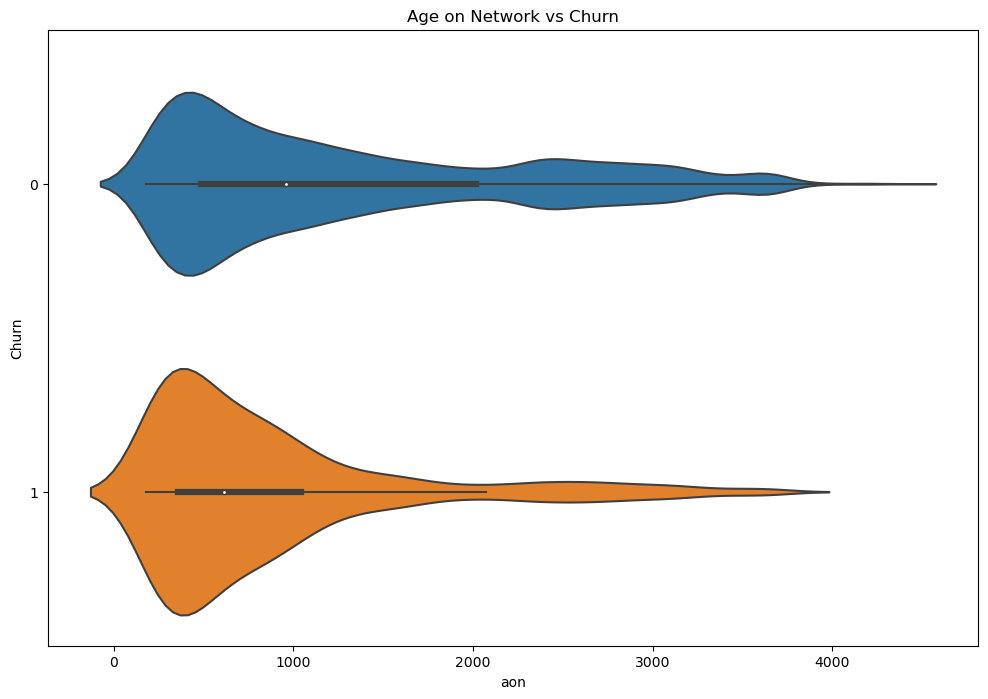

In [71]:
plt.figure(figsize=(12,8))
sns.violinplot(x='aon', y='Churn', data=tel_churn_df)
plt.title('Age on Network vs Churn')
plt.show()

- The customers with lesser 'aon' are more likely to Churn when compared to the Customers with higer 'aon'

In [72]:
def num_univariate_analysis(column_names,scale='linear') : 
    # boxplot for column vs target
    
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,3,1)
    sns.violinplot(x='Churn', y = column_names[0], data = tel_churn_df, ax=ax1)
    title = ''.join(column_names[0]) +' vs Churn'
    ax1.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax1.set(ylabel= column_names[0] + '(Log Scale)')
        
    ax2 = fig.add_subplot(1,3,2)
    sns.violinplot(x='Churn', y = column_names[1], data = tel_churn_df, ax=ax2)
    title = ''.join(column_names[1]) +' vs Churn'
    ax2.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax2.set(ylabel= column_names[1] + '(Log Scale)')
    
    ax3 = fig.add_subplot(1,3,3)
    sns.violinplot(x='Churn', y = column_names[2], data = tel_churn_df, ax=ax3)
    title = ''.join(column_names[2]) +' vs Churn'
    ax3.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax3.set(ylabel= column_names[2] + '(Log Scale)')
    
    # summary statistic
    
    print('Customers who churned (Churn : 1)')
    print(churned_customers[column_names].describe())
    
    print('\nCustomers who did not churn (Churn : 0)')
    print(non_churned_customers[column_names].describe(),'\n')

In [73]:
# function for categorical variable univariate analysis
!pip install sidetable
import sidetable
def cat_univariate_analysis(column_names,figsize=(16,4)) : 
    
    # column vs target count plot
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(1,3,1)
    sns.countplot(x=column_names[0],hue='Churn',data=tel_churn_df, ax=ax1)
    title = column_names[0] + ' vs No of Churned Customers'
    ax1.set(title= title)
    ax1.legend(loc='upper right')

    
    ax2 = fig.add_subplot(1,3,2)
    sns.countplot(x=column_names[1],hue='Churn',data=tel_churn_df, ax=ax2)
    title = column_names[1] + ' vs No of Churned Customers'
    ax2.set(title= title)
    ax2.legend(loc='upper right')

        
    ax3 = fig.add_subplot(1,3,3)
    sns.countplot(x=column_names[2],hue='Churn',data=tel_churn_df, ax=ax3)
    title = column_names[2] + ' vs No of Churned Customers'
    ax3.set(title= title)
    ax3.legend(loc='upper right')

        
    # Percentages 
    print('Customers who churned (Churn : 1)')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

    print('\nCustomers who did not churn (Churn : 0)')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

Customers who churned (Churn : 1)
             arpu_6        arpu_7       arpu_8
count   2593.000000   2593.000000  2593.000000
mean     678.716970    550.511946   243.063343
std      551.792864    517.241221   378.843531
min     -209.465000   -158.963000   -37.887000
25%      396.507000    289.641000     0.000000
50%      573.396000    464.674000   101.894000
75%      819.460000    691.588000   351.028000
max    11505.508000  13224.119000  5228.826000

Customers who did not churn (Churn : 0)
             arpu_6        arpu_7        arpu_8
count  27418.000000  27418.000000  27418.000000
mean     578.637360    592.788162    562.453248
std      429.988265    457.265996    492.802655
min    -2258.709000  -2014.045000   -945.808000
25%      362.218000    369.610500    319.118500
50%      489.324000    496.182500    471.024000
75%      690.891750    701.418000    690.921000
max    27731.088000  35145.834000  33543.624000 



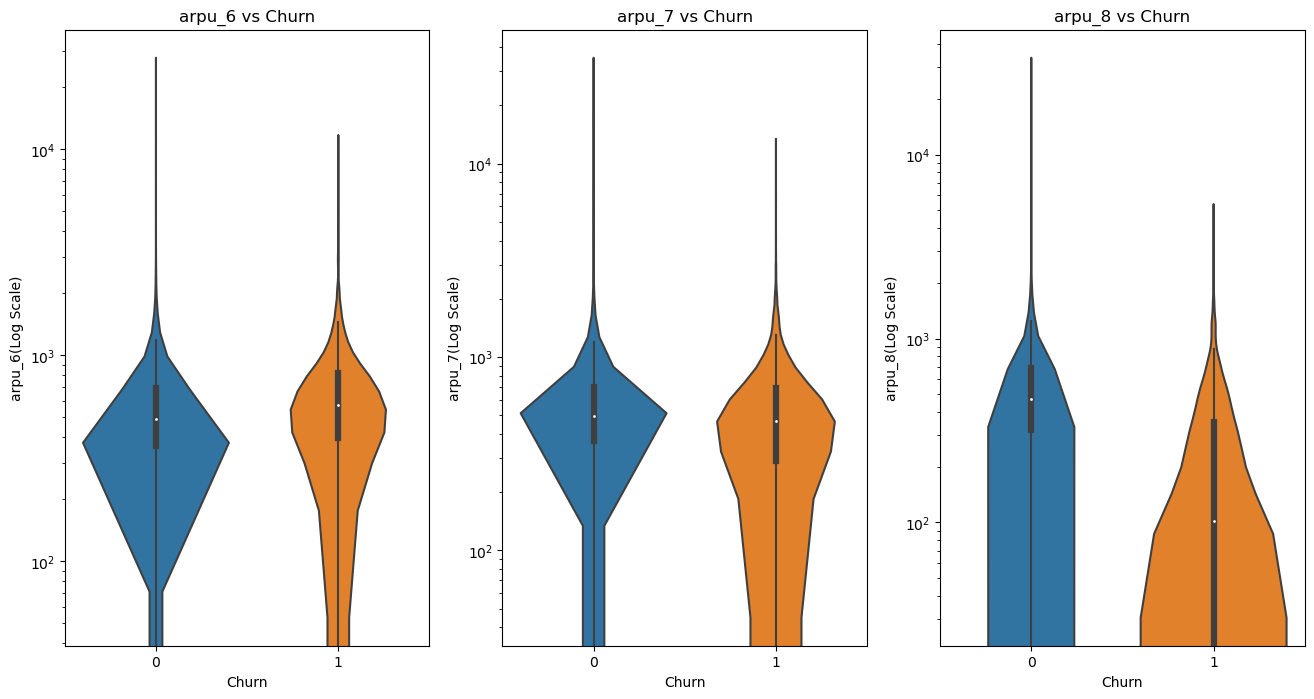

In [74]:
columns = ['arpu_6','arpu_7','arpu_8']
num_univariate_analysis(columns,'log')

- We can understand from the above plots that revenue generated by the Customers who are about to churn is very unstable.
- The Customers whose arpu decreases in 7th month are more likely to churn when compared to ones with increase in arpu.

**total_og_mou_6, total_og_mou_7, total_og_mou_8**

Customers who churned (Churn : 1)
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count     2593.000000     2593.000000     2593.000000
mean       241.954404      193.341076       68.807042
std        360.836586      318.183813      154.450340
min          0.000000        0.000000        0.000000
25%         49.460000       27.890000        0.000000
50%        137.330000       99.980000        0.000000
75%        289.510000      235.740000       70.290000
max       6633.180000     5137.560000     1859.280000

Customers who did not churn (Churn : 0)
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count    27418.000000    27418.000000    27418.000000
mean       313.712052      326.369333      316.858595
std        360.580253      372.112086      366.818717
min          0.000000        0.000000        0.000000
25%         94.460000      107.802500       98.265000
50%        212.160000      222.290000      212.360000
75%        401.602500      410.182500      402.270000
max    

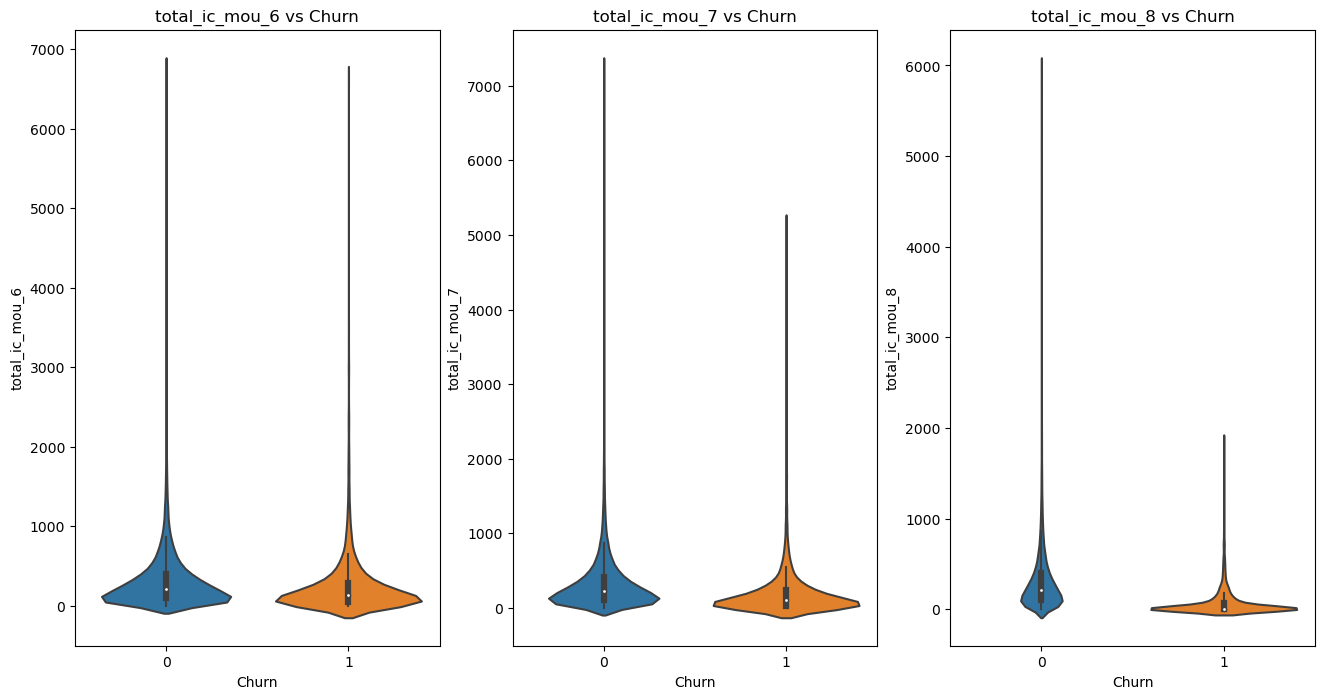

In [75]:
columns = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
num_univariate_analysis(columns)

**vol_2g_mb_6, vol_2g_mb_7, vol_2g_mb_8**

Customers who churned (Churn : 1)
       vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8
count  2593.000000  2593.000000  2593.000000
mean     60.775588    49.054393    15.283185
std     243.084276   219.485813   120.975111
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    4017.160000  3430.730000  3349.190000

Customers who did not churn (Churn : 0)
        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8
count  27418.000000  27418.000000  27418.000000
mean      80.569210     80.925060     74.309036
std      280.420463    285.265125    277.889339
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%       16.937500     18.267500     14.245000
max    10285.900000   7873.550000  11117.610000 



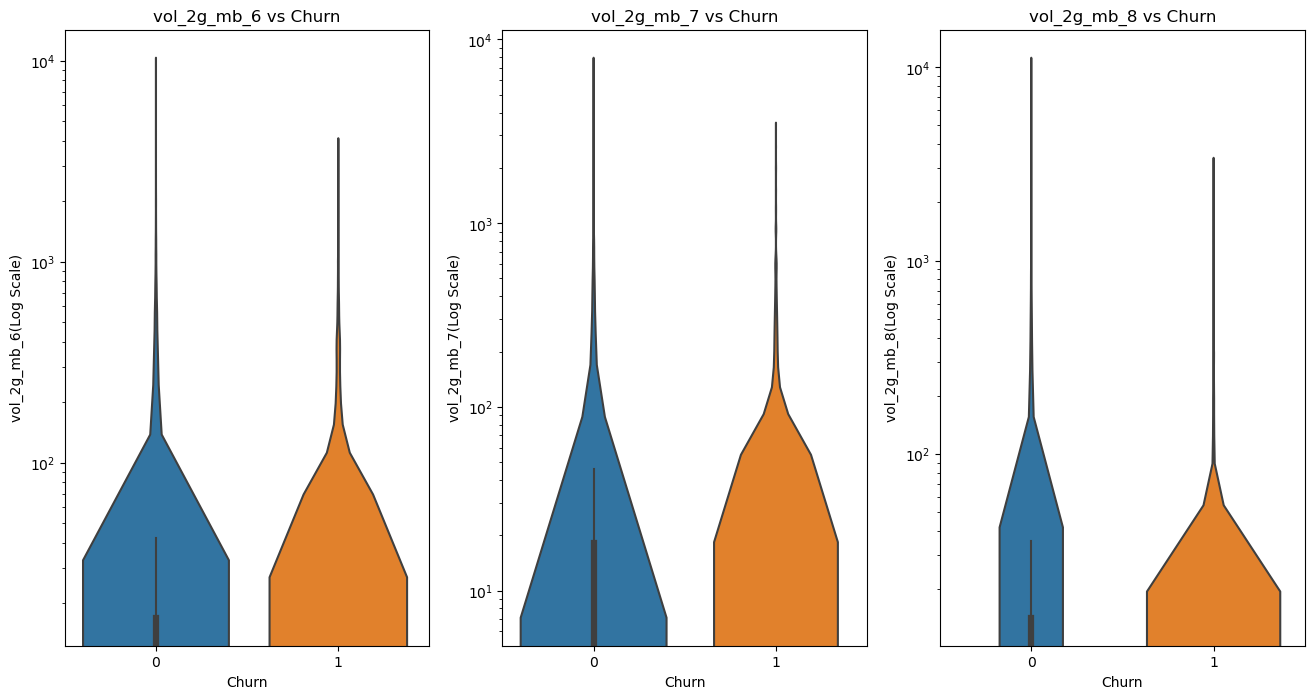

In [76]:
columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
num_univariate_analysis(columns, 'log')

**vol_3g_mb_6, vol_3g_mb_7, vol_3g_mb_8, monthly_3g_6**

Customers who churned (Churn : 1)
       vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  monthly_3g_6
count  2593.000000   2593.000000   2593.000000   2593.000000
mean    188.395461    157.714254     56.776880      0.134593
std     715.327843    690.773561    446.532769      0.495359
min       0.000000      0.000000      0.000000      0.000000
25%       0.000000      0.000000      0.000000      0.000000
50%       0.000000      0.000000      0.000000      0.000000
75%       0.000000      0.000000      0.000000      0.000000
max    9400.120000  15115.510000  13440.720000      6.000000

Customers who did not churn (Churn : 0)
        vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  monthly_3g_6
count  27418.000000  27418.000000  27418.000000  27418.000000
mean     265.012522    289.478375    290.016390      0.177621
std      878.846885    868.808831    885.821105      0.581065
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50% 

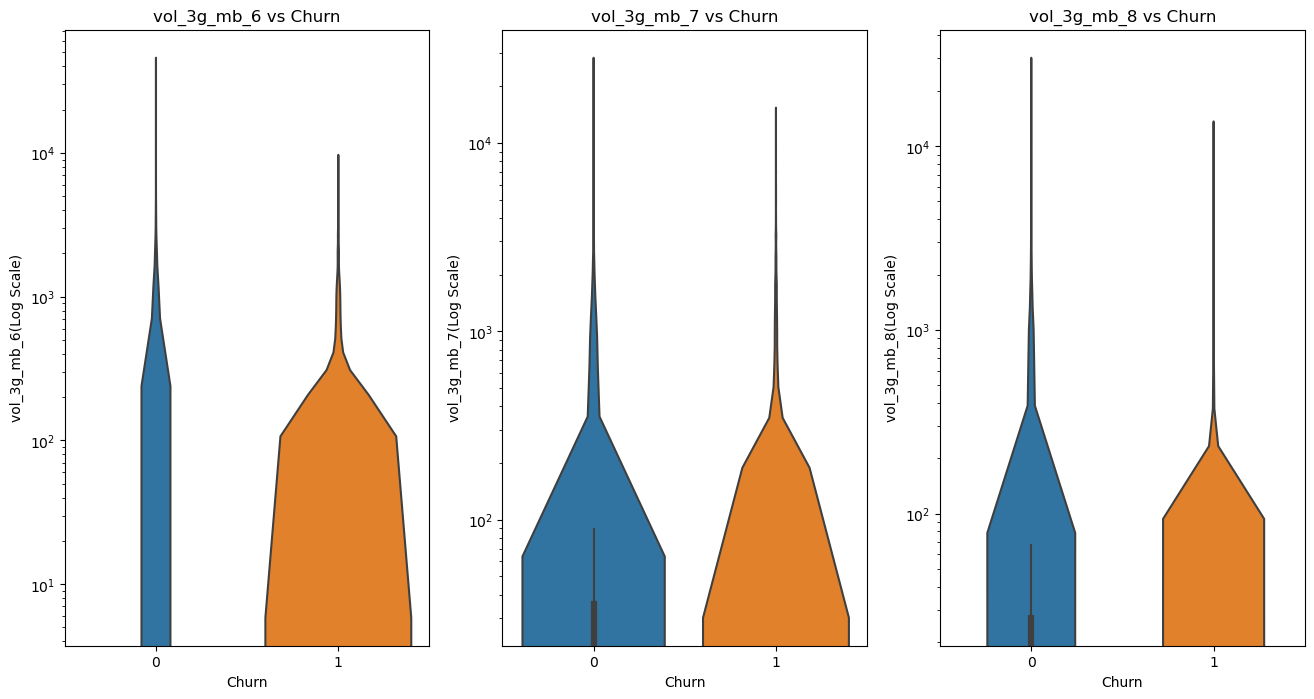

In [77]:
columns = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_3g_6']
num_univariate_analysis(columns, 'log')

- Customers with stable usage of 3g volumes throughout 6 and 7 months are less likely to churn.
- Customers with fall in consumption of 3g volumes in 7th month are more likely to Churn.

**monthly_2g_6, monthly_2g_7, monthly_2g_8**

Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_2g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    2454 | 94.6394    |               2454 |              94.6394 |
|  1 |              1 |     126 |  4.85924   |               2580 |              99.4987 |
|  2 |              2 |      11 |  0.424219  |               2591 |              99.9229 |
|  3 |              4 |       2 |  0.0771307 |               2593 |             100      |
+----+----------------+---------+------------+--------------------+----------------------+ 

+----+----------------+---------+-----------+--------------------+----------------------+
|    |   monthly_2g_7 |   count |   percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+-----------+-----------

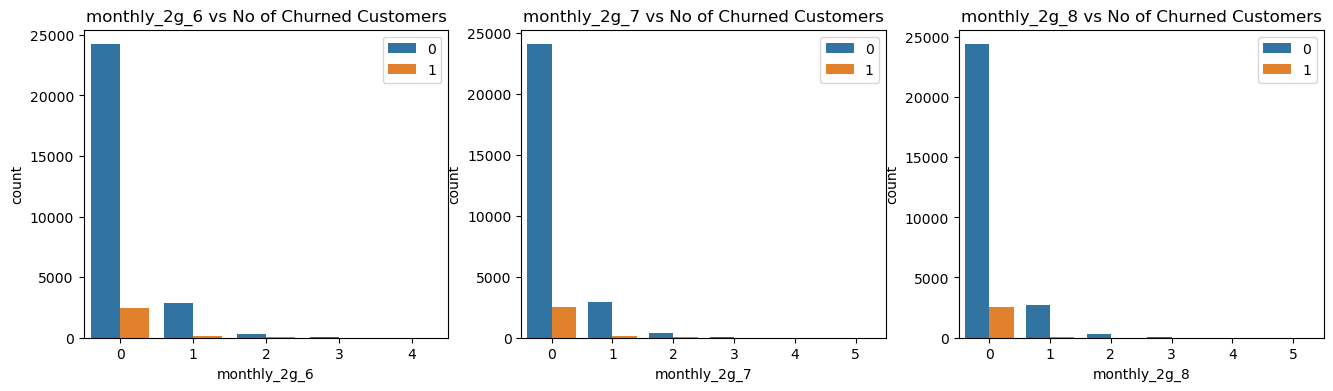

In [78]:
columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
cat_univariate_analysis(columns)

**monthly_3g_6, monthly_3g_7, monthly_3g_8**

Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    2352 | 90.7057    |               2352 |              90.7057 |
|  1 |              1 |     170 |  6.55611   |               2522 |              97.2619 |
|  2 |              2 |      49 |  1.8897    |               2571 |              99.1516 |
|  3 |              3 |      13 |  0.50135   |               2584 |              99.6529 |
|  4 |              5 |       4 |  0.154261  |               2588 |              99.8072 |
|  5 |              4 |       4 |  0.154261  |               2592 |              99.9614 |
|  6 |              6 |       1 |  0.0385654 |               2593 |             100      |
+----+----------------+---------+------------+----------

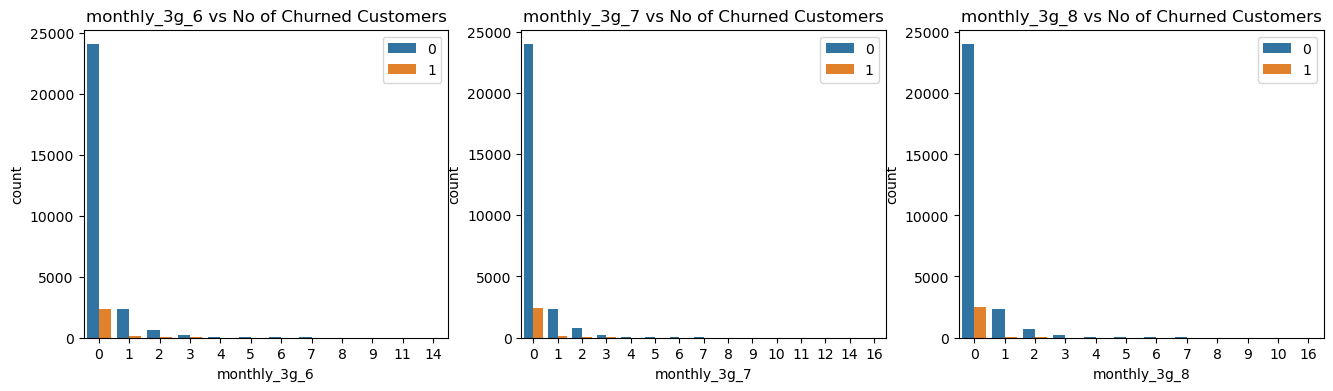

In [79]:
columns = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
cat_univariate_analysis(columns)

**sachet_3g_6, sachet_3g_7, sachet_3g_8**

sachet_3g_6    int64
sachet_3g_7    int64
sachet_3g_8    int64
dtype: object
Customers who churned (Churn : 1)
+----+---------------+---------+------------+--------------------+----------------------+
|    |   sachet_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+---------------+---------+------------+--------------------+----------------------|
|  0 |             0 |    2454 | 94.6394    |               2454 |              94.6394 |
|  1 |             1 |      87 |  3.35519   |               2541 |              97.9946 |
|  2 |             2 |      16 |  0.617046  |               2557 |              98.6116 |
|  3 |             4 |      11 |  0.424219  |               2568 |              99.0359 |
|  4 |             3 |       8 |  0.308523  |               2576 |              99.3444 |
|  5 |            10 |       4 |  0.154261  |               2580 |              99.4987 |
|  6 |             7 |       4 |  0.154261  |               2584 |             

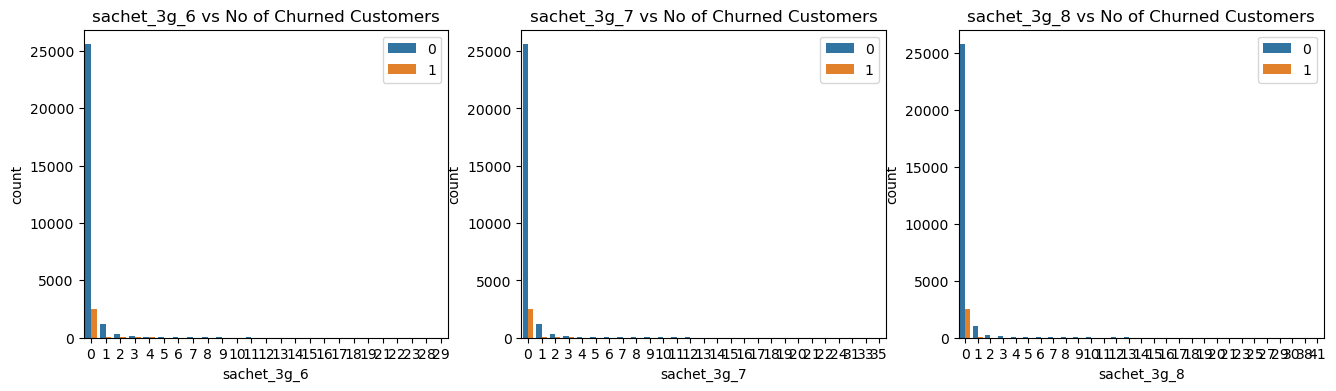

In [80]:
columns = ['sachet_3g_6', 'sachet_3g_7','sachet_3g_8']
print(tel_churn_df[columns].dtypes)
cat_univariate_analysis(columns)

**aug_vbc_3g, jul_vbc_3g, jun_vbc_3g**

Customers who churned (Churn : 1)
          vbc_3g_6     vbc_3g_7     vbc_3g_8
count  2593.000000  2593.000000  2593.000000
mean     81.564601    71.143880    32.610659
std     320.898511   284.882601   197.998246
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    6931.810000  4908.270000  5738.740000

Customers who did not churn (Churn : 0)
           vbc_3g_6      vbc_3g_7      vbc_3g_8
count  27418.000000  27418.000000  27418.000000
mean     125.124167    141.178182    138.597023
std      395.413666    417.292310    402.761779
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      9.940000     17.675000
max    11166.210000   9165.600000  12916.220000 



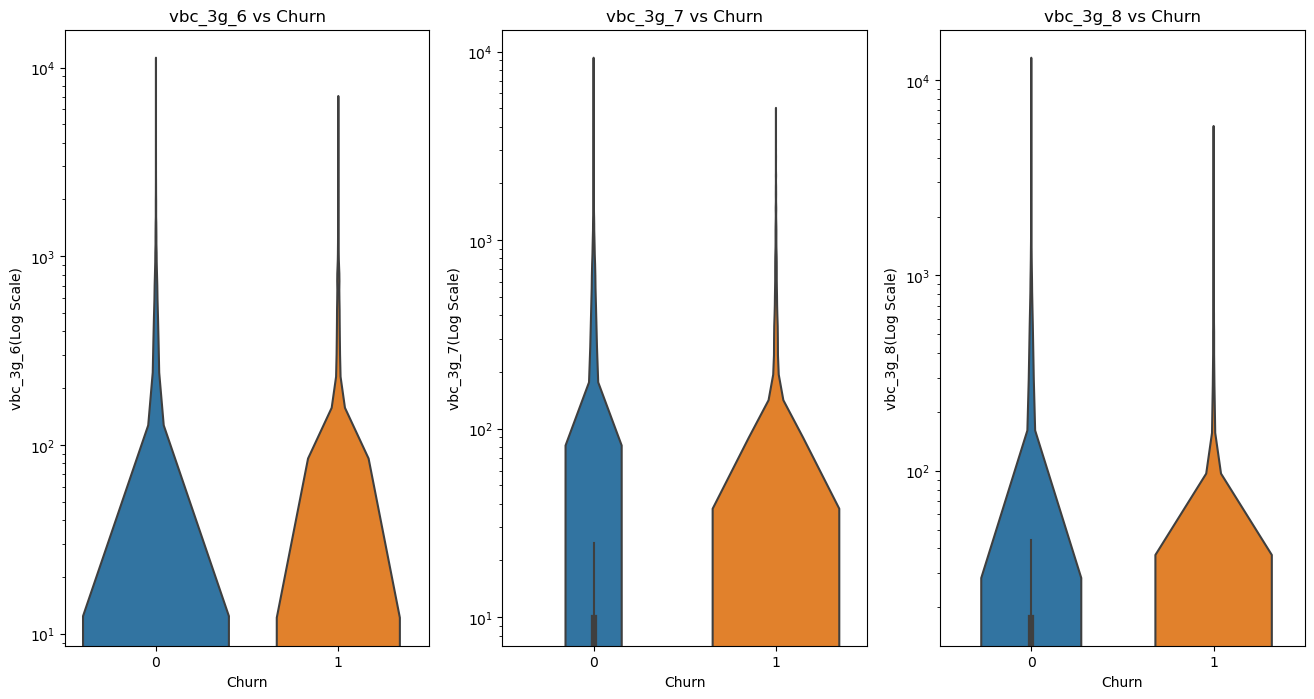

In [81]:
columns = [ 'vbc_3g_6', 'vbc_3g_7','vbc_3g_8']
num_univariate_analysis(columns, 'log')

## Bivariate Analysis

In [82]:
tel_churn_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
7000875565,430.975,299.869,187.894,50.51,74.01,7

### 'total_og_mou_6' vs 'total_og_mou_8' with respect to Churn

<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

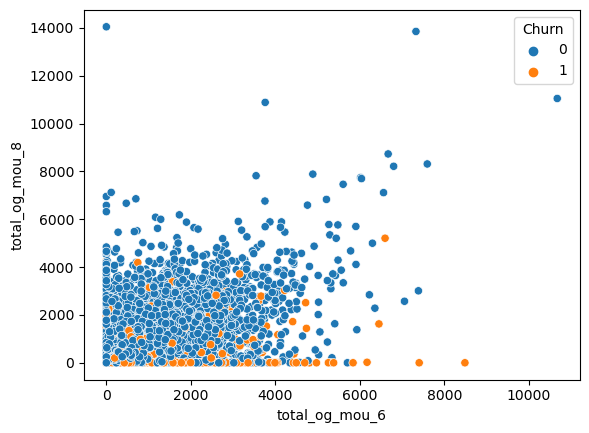

In [83]:
sns.scatterplot(x=tel_churn_df['total_og_mou_6'],y=tel_churn_df['total_og_mou_8'],hue=tel_churn_df['Churn'])

### total_og_mou_7' vs 'total_og_mou_8' with respect to Churn

<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

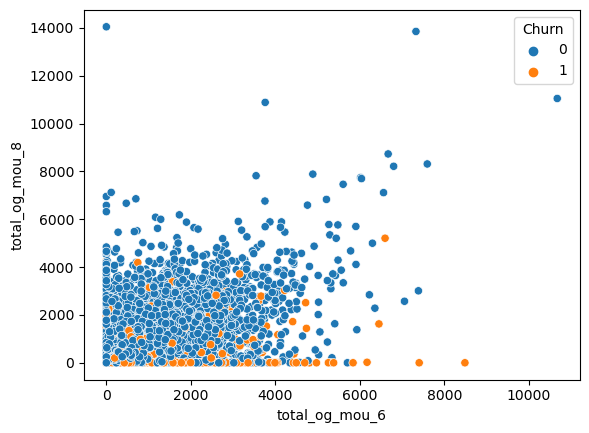

In [84]:
sns.scatterplot(x=tel_churn_df['total_og_mou_6'],y=tel_churn_df['total_og_mou_8'],hue=tel_churn_df['Churn'])

- Customers exhibiting lower total outgoing minutes of usage (total_og_mou) in the 6th and 8th months are more inclined to churn compared to those with higher total_og_mou

### 'aon' vs 'total_og_mou_8' with respect to Churn.

<Axes: xlabel='aon', ylabel='total_og_mou_8'>

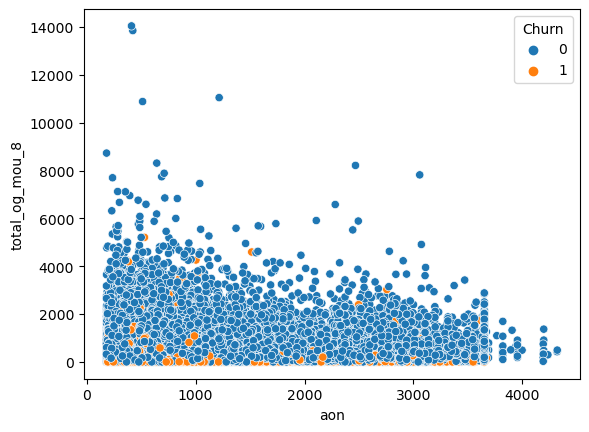

In [85]:
sns.scatterplot(x=tel_churn_df['aon'],y=tel_churn_df['total_og_mou_8'],hue=tel_churn_df['Churn'])

- Customers with lower total_og_mou_8 and a longer association (aon) duration are more prone to churn compared to those with higher total_og_mou_8 and aon duration.

<Axes: xlabel='aon', ylabel='total_ic_mou_8'>

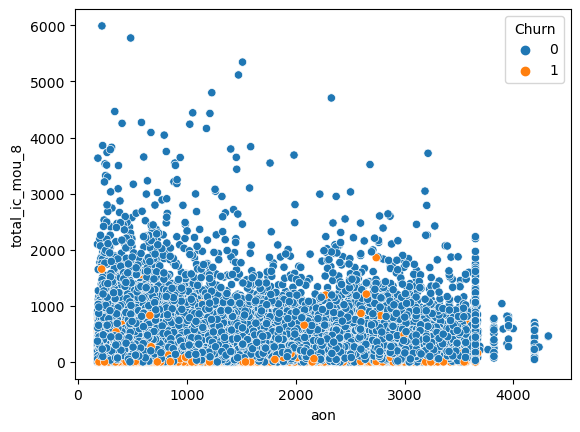

In [86]:
sns.scatterplot(x=tel_churn_df['aon'],y=tel_churn_df['total_ic_mou_8'],hue=tel_churn_df['Churn'])

- The customers with less total_ic_mou_8 are more likely to churn irrespective of aon.
- The customers with total_ic_mou_8 > 2000 are very less likely to churn.

### 'max_rech_amt_6' vs 'max_rech_amt_8' with respect to 'Churn'.

<Axes: xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

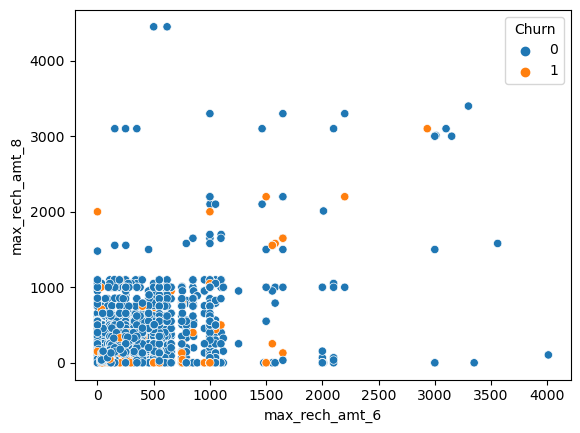

In [87]:
sns.scatterplot(x=tel_churn_df['max_rech_amt_6'],y=tel_churn_df['max_rech_amt_8'],hue=tel_churn_df['Churn'])

## Correlation Analysis


In [88]:
# function to correlate variables
def correlation(dataframe):
    columnsForAnalysis = list(set(dataframe.columns.values) - {'Churn'})
    cor0 = dataframe[columnsForAnalysis].corr()
    cor0 = cor0.where(np.triu(np.ones(cor0.shape), k=1).astype(bool))
    cor0 = cor0.unstack().reset_index()
    cor0.columns = ['VAR1', 'VAR2', 'CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0['CORR'] = round(cor0['CORR'].abs(), 2)
    cor0 = cor0[~(cor0['VAR1'] == cor0['VAR2'])]

    # removing duplicate correlations
    cor0['pair'] = cor0[['VAR1', 'VAR2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)
    cor0 = cor0.drop_duplicates(subset=['pair'], keep='first')
    cor0 = cor0[['VAR1', 'VAR2', 'CORR']]
    
    return cor0.sort_values(by='CORR', ascending=False)



In [89]:
# Correlations for Churn : 0  - non churn customers
# Absolute values are reported 
cor_0 = correlation(non_churned_customers)

# filtering for correlations >= 40%
condition = cor_0['CORR'] > 0.4
cor_0_filtered = cor_0[condition]

# Styling with background gradient
styled_cor_0 = cor_0_filtered.style.background_gradient(cmap='GnBu')

# Hide the index
styled_cor_0.set_table_styles([{'selector': 'tr th.row_heading', 'props': [('display', 'none')]}])

# Convert styled DataFrame to HTML
styled_html = styled_cor_0.to_html()


# Display the HTML
from IPython.display import display, HTML
display(HTML(styled_html))

,VAR1,VAR2,CORR
11155,isd_og_mou_8,isd_og_mou_7,0.960000
10402,total_rech_amt_8,arpu_8,0.950000
9905,isd_og_mou_6,isd_og_mou_7,0.950000
11204,isd_og_mou_8,isd_og_mou_6,0.950000
13898,arpu_7,total_rech_amt_7,0.940000
13676,arpu_6,total_rech_amt_6,0.940000
13983,arpu_7,Average_rech_amt_6n7,0.910000
13523,Average_rech_amt_6n7,total_rech_amt_7,0.910000
13321,total_ic_mou_6,loc_ic_mou_6,0.900000
13551,Average_rech_amt_6n7,total_rech_amt_6,0.900000


In [90]:
# Correlations for Churn : 1  - churned customers
# Absolute values are reported 
cor_1 = correlation(non_churned_customers)

# filtering for correlations >= 40%
condition = cor_1['CORR'] > 0.4
cor_1_filtered = cor_1[condition]

# Styling with background gradient
styled_cor_1 = cor_1_filtered.style.background_gradient(cmap='GnBu')

# Hide the index
styled_cor_1.set_table_styles([{'selector': 'tr th.row_heading', 'props': [('display', 'none')]}])

# Convert styled DataFrame to HTML
styled_html = styled_cor_1.to_html()


# Display the HTML
from IPython.display import display, HTML
display(HTML(styled_html))

,VAR1,VAR2,CORR
11155,isd_og_mou_8,isd_og_mou_7,0.960000
10402,total_rech_amt_8,arpu_8,0.950000
9905,isd_og_mou_6,isd_og_mou_7,0.950000
11204,isd_og_mou_8,isd_og_mou_6,0.950000
13898,arpu_7,total_rech_amt_7,0.940000
13676,arpu_6,total_rech_amt_6,0.940000
13983,arpu_7,Average_rech_amt_6n7,0.910000
13523,Average_rech_amt_6n7,total_rech_amt_7,0.910000
13321,total_ic_mou_6,loc_ic_mou_6,0.900000
13551,Average_rech_amt_6n7,total_rech_amt_6,0.900000


## Data Preparation

In [91]:
# Derived variables to measure change in usage
tel_churn_df['delta_vol_2g'] = tel_churn_df['vol_2g_mb_8'] - (tel_churn_df['vol_2g_mb_6'] + tel_churn_df['vol_2g_mb_7']) / 2
tel_churn_df['delta_vol_3g'] = tel_churn_df['vol_3g_mb_8'] - (tel_churn_df['vol_3g_mb_6'] + tel_churn_df['vol_3g_mb_7']) / 2
tel_churn_df['delta_total_og_mou'] = tel_churn_df['total_og_mou_8'] - (tel_churn_df['total_og_mou_6'] + tel_churn_df['total_og_mou_7']) / 2
tel_churn_df['delta_total_ic_mou'] = tel_churn_df['total_ic_mou_8'] - (tel_churn_df['total_ic_mou_6'] + tel_churn_df['total_ic_mou_7']) / 2
tel_churn_df['delta_vbc_3g'] = tel_churn_df['vbc_3g_8'] - (tel_churn_df['vbc_3g_6'] + tel_churn_df['vbc_3g_7']) / 2

# Derived variables to measure change in revenue
tel_churn_df['delta_arpu'] = tel_churn_df['arpu_8'] - (tel_churn_df['arpu_6'] + tel_churn_df['arpu_7']) / 2
tel_churn_df['delta_total_rech_amt'] = tel_churn_df['total_rech_amt_8'] - (tel_churn_df['total_rech_amt_6'] + tel_churn_df['total_rech_amt_7']) / 2


In [92]:
# Removing variables used for derivation : 
tel_churn_df.drop(columns=[
 'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
  'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
    'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
    'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
    'vbc_3g_8','vbc_3g_6','vbc_3g_7',
    'arpu_8','arpu_6','arpu_7',
    'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'
    
], inplace=True)

## Outlier Treatment

In [93]:
# Select only numeric columns
numeric_df = tel_churn_df.select_dtypes(include=np.number)

# Calculate quantiles from 0.90 to 1.0
quantiles = numeric_df.quantile(np.arange(0.9, 1.01, 0.01))
quantiles

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.90,794.980,824.380,723.610,915.580,935.690,853.790,32.730,18.360,18.680,64.480,41.200,37.110,207.930,207.840,196.910,435.160,437.490,416.660,18.380,18.660,16.960,4.040,4.840,4.450,661.740,657.380,633.340,630.530,663.790,567.340,604.410,645.880,531.260,2.200,2.180,1.730,1140.930,1177.180,1057.290,0.000,0.000,0.000,15.930,19.510,18.040,2.260,0.00,0.00,154.880,156.610,148.140,368.540,364.540,360.540,39.230,41.040,37.190,559.280,558.990,549.790,34.730,36.010,32.140,73.380,75.280,68.580,4.360,4.580,3.940,115.910,118.660,108.380,0.28,0.00,0.00,15.010,18.300,15.330,1.160,1.590,1.230,23.0,23.0,21.0,297.0,300.0,252.0,250.0,250.0,225.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,2846.0,1118.00,29.8350,170.0750,345.0700,147.3000,69.8300,257.30950,319.0
0.91,848.967,878.352,783.488,966.740,984.020,899.286,39.692,23.281,23.392,78.431,50.012,46.435,225.963,224.873,213.831,461.095,461.812,441.836,20.281,20.680,18.840,4.680,5.512,5.112,703.112,692.668,669.633,686.255,722.843,622.128,658.472,695.767,583.424,2.910,2.800,2.280,1195.610,1244.396,1125.276,0.000,0.000,0.000,17.540,21.283,19.692,2.540,0.00,0.00,165.792,168.033,159.838,390.636,387.112,382.199,43.590,45.392,41.212,593.133,589.645,580.535,38.212,39.912,35.930,80.412,81.931,75.542,5.210,5.491,4.710,125.981,129.288,118.240,0.30,0.00,0.00,18.341,21.841,18.831,1.440,1.940,1.510,24.0,24.0,22.0,325.0,330.0,289.0,250.0,250.0,250.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,2910.1,1156.00,39.8830,227.1510,377.4605,161.8010,95.3250,278.90040,345.5
0.92,909.054,941.990,848.964,1031.390,1038.090,953.354,48.710,29.680,29.644,93.598,60.966,57.594,247.944,244.780,232.330,490.630,488.036,468.830,22.560,23.144,20.930,5.450,6.260,5.864,742.956,735.694,711.570,750.312,786.386,680.104,713.490,760.976,640.566,3.740,3.710,3.010,1268.830,1315.080,1201.290,0.130,0.050,0.000,19.260,23.394,21.780,2.860,0.00,0.00,180.182,181.494,173.592,415.888,412.030,405.970,48.648,50.664,46.190,629.636,624.360,614.446,42.732,44.582,39.990,88.266,90.410,83.444,6.330,6.610,5.752,138.320,142.158,130.552,0.33,0.00,0.03,22.582,26.940,23.576,1.780,2.380,1.860,25.0,25.0,23.0,350.0,350.0,330.0,250.0,250.0,250.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2981.2,1202.00,53.6620,289.3010,419.9670,177.3460,127.5030,303.50900,375.0
0.93,990.480,1016.145,920.961,1094.767,1103.926,1017.346,60.416,37.283,37.902,1

In [94]:
# Columns with outliers 
numeric_df = tel_churn_df.select_dtypes(include=np.number)

# Calculate quantiles from 0.90 to 1.0
quantiles = numeric_df.quantile(np.arange(0.9, 1.01, 0.01))

# Compute percentage change in quantiles
quantiles_pct_change = quantiles.pct_change()

print('Columns with outliers :\n', quantiles_pct_change)


Columns with outliers :
       onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0.90          NaN          NaN          NaN           NaN           NaN   
0.91     0.067910     0.065470     0.082749      0.055877      0.051652   
0.92     0.070777     0.072452     0.083570      0.066874      0.054948   
0.93     0.089572     0.078722     0.084806      0.061448      0.063420   
0.94     0.077102     0.079692     0.094029      0.066978      0.074672   
0.95     0.081663     0.101220     0.107291      0.088502      0.084230   
0.96     0.111620     0.112455     0.126092      0.105862      0.094456   
0.97     0.125862     0.113995     0.147406      0.122859      0.125895   
0.98     0.173412     0.183913     0.179469      0.164120      0.159857   
0.99     0.278339     0.252592     0.287177      0.265709      0.310986   
1.00     2.405102     2.674068     3.913201      2.594719      3.011084   

      offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0.90   

In [95]:
# Select only numeric columns
numeric_df = tel_churn_df.select_dtypes(include=np.number)

# Calculate quantiles from 0.90 to 1.0
quantiles = numeric_df.quantile(np.arange(0.9, 1.01, 0.01))

# Compute percentage change in quantiles
quantiles_pct_change = quantiles.pct_change().mul(100).iloc[-1]

# Identify columns with outliers based on condition
outlier_condition = quantiles_pct_change > 100
columns_with_outliers = quantiles_pct_change[outlier_condition].index.values

# Print columns with outliers
print('Columns with outliers :\n', columns_with_outliers)


Columns with outliers :
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6'
 'og_others_7' 'og_others_8' 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7'
 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7'
 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6' 'loc_ic_t2f_mou_7'
 'lo

In [96]:
# Initialize a list to store outlier treatment information
outlier_treatment_data = []

# Iterate through columns with outliers
for col in columns_with_outliers: 
    # Calculate the outlier threshold (99th percentile)
    outlier_threshold = tel_churn_df[col].quantile(0.99)
    
    # Identify outliers
    condition = tel_churn_df[col] > outlier_threshold
    
    # Count outliers
    outliers_replaced = condition.sum()
    
    # Cap outliers to the 99th percentile value
    tel_churn_df.loc[condition, col] = outlier_threshold
    
    # Store outlier treatment information in the list
    outlier_treatment_data.append({'Column': col, 'Outlier Threshold': outlier_threshold, 'Outliers replaced': outliers_replaced})

# Convert the list to a DataFrame
outlier_treatment = pd.DataFrame(outlier_treatment_data)

# Display outlier treatment information
print(outlier_treatment)

                   Column  Outlier Threshold  Outliers replaced
0             onnet_mou_6         2166.37000                301
1             onnet_mou_7         2220.36700                301
2             onnet_mou_8         2188.50400                301
3            offnet_mou_6         2326.29000                301
4            offnet_mou_7         2410.10400                301
5            offnet_mou_8         2211.64200                301
6           roam_ic_mou_6          349.35300                301
7           roam_ic_mou_7          292.54000                301
8           roam_ic_mou_8          288.48500                301
9           roam_og_mou_6          543.70900                301
10          roam_og_mou_7          448.12500                301
11          roam_og_mou_8          432.74300                301
12       loc_og_t2t_mou_6         1076.24200                301
13       loc_og_t2t_mou_7         1059.87500                301
14       loc_og_t2t_mou_8          956.5

**This following section contains**

- Test Train Split
= Class Imbalance
= Standardization
- Modelling
    - Model 1 : Logistic Regression with RFE & Manual Elimination ( Interpretable Model )
    - Model 2 : PCA + Logistic Regression
    - Model 3 : PCA + Random Forest Classifier
    - Model 4 : PCA + XGBoost

### Train-Test Split


In [97]:
y = tel_churn_df.pop('Churn') # Predicted / Target Variable
X = tel_churn_df # Predictor variables

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

### Class Imbalance

In [99]:
y.value_counts(normalize=True).to_frame()

,proportion
Churn,
0,0.913598
1,0.086402


In [100]:
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.095


- To account for class imbalance, Synthetic Minority Class Oversampling Technique (SMOTE) could be used.

### Using SMOTE

In [101]:

smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0,53.01,52.64,37.48,316.01,195.74,68.36,0.0,0.0,0.0,0.0,0.0,0.0,53.01,52.64,37.48,282.38,171.64,44.51,31.59,17.38,19.43,0.0,0.0,0.00,366.99,241.68,101.43,0.00,0.00,0.00,0.00,2.11,0.00,2.03,4.59,4.41,2.03,6.71,4.41,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,18.41,40.79,11.79,292.99,191.98,85.89,6.26,1.21,10.39,317.68,233.99,108.09,0.00,0.00,0.00,0.66,0.00,0.00,5.61,1.53,2.76,6.28,1.53,2.76,0.00,0.0,0.00,0.00,0.00,9.55,0.00,0.00,0.00,6,5,4,198,198,198,110,130,130,1,1,1,0.0,0,0,0,0,0,0,0,0,1423,483.0,-791.7700,1077.750,-202.870,-159.335,71.085,-172.4995,-155.0
1,91.39,216.14,150.58,504.19,301.98,434.41,0.0,0.0,0.0,0.0,0.0,0.0,40.36,36.21,27.73,37.26,36.73,59.61,0.00,0.00,0.00,0.0,0.0,0.58,77.63,72.94,87.34,51.03,179.93,122.84,465.96,265.24,356.44,0.00,0.00,0.00,516.99,445.18,479.29,0.96,0.0,3.89,0.0,0.0,14.45,0.0,0.0,0.0,104.39,31.98,35.83,154.11,147.88,243.53,0.00,0.76,0.00,258.51,180.63,279.36,4.03,2.99,0.46,6.36,12.31,3.91,0.00,0.00,0.00,10.39,15.31,4.38,0.58,0.0,0.25,19.66,21.96,86.63,0.23,0.56,1.04,8,11,12,110,130,130,0,130,0,0,0,0,0.0,0,0,0,0,0,0,0,0,189,454.0,0.0000,0.000,28.130,117.745,0.000,48.6160,-94.0
2,11.96,14.13,0.40,1.51,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,11.96,14.13,0.40,1.51,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,13.48,14.13,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,20.58,20.39,97.66,36.84,21.58,18.66,5.48,0.73,1.43,62.91,42.71,117.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5,3,4,252,252,252,252,0,252,0,0,0,0.0,0,0,2,1,2,0,0,0,2922,403.0,-44.6300,-5.525,-13.405,64.950,0.000,75.3940,151.0
3,532.66,537.31,738.21,49.03,71.64,39.43,0.0,0.0,0.0,0.0,0.0,0.0,24.46,19.79,37.74,41.26,47.86,39.43,1.19,4.04,0.00,0.0,0.0,0.00,66.93,71.71,77.18,508.19,517.51,700.46,6.56,18.24,0.00,0.00,1.48,0.00,514.76,537.24,700.46,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,19.86,28.81,20.24,66.08,94.18,67.54,51.74,68.16,50.08,137.69,191.16,137.88,18.83,14.56,1.28,1.08,20.89,6.83,0.00,3.08,3.05,19.91,38.54,11.16,0.00,0.0,0.00,0.00,5.28,7.49,0.00,0.00,0.00,10,13,12,145,150,145,0,150,0,0,0,0,0.0,0,0,1,1,2,0,0,0,1128,521.0,-10.1500,-108.195,182.315,-39.760,0.000,192.8075,207.0
4,122.68,105.51,149.33,302.23,211.44,264.11,0.0,0.0,0.0,0.0,0.0,0.0,122.68,105.51,149.33,301.04,194.06,257.14,0.00,0.66,0.51,0.0,0.0,0.00,423.7

## Standardizing Columns

In [102]:
condition1 = tel_churn_df.dtypes == 'int64'  # Assuming the integer data type is int64
condition2 = tel_churn_df.dtypes == 'float64'  # Assuming the float data type is float64
numerical_vars = tel_churn_df.columns[(condition1) | (condition2)].tolist()


In [103]:
# Standard scaling

scaler = StandardScaler() 

# Fit and transform train set 
X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])

# Transform test set
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

In [104]:
# summary statistics of standardized variables
round(X_train_resampled.describe(),2)

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
count,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.0,38374.0,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.73,-0.68,-0.53,-0.94,-0.89,-0.70,-0.31,-0.32,-0.33,-0.33,-0.36,-0.36,-0.50,-0.49,-0.42,-0.75,-0.73,-0.59,-0.38,-0.38,-0.33,-0.37,-0.37,-0.31,-0.76,-0.74,-0.60,-0.57,-0.54,-0.40

## Model Prepairation 

### Model 1 : Interpretable Model : Logistic Regression

In [105]:
# Step 1: Initialize the logistic regression model
baseline_model = LogisticRegression(random_state=100, class_weight='balanced')

# Step 2: Fit the model to the training data
baseline_model.fit(X_train, y_train)

# Step 3: Predict probabilities for the training and test data
train_pred_prob = baseline_model.predict_proba(X_train)[:, 1]
test_pred_prob = baseline_model.predict_proba(X_test)[:, 1]

# Step 4: Convert predictions to pandas Series with preserved index
y_train_pred = pd.Series(train_pred_prob, index=X_train.index)
y_test_pred = pd.Series(test_pred_prob, index=X_test.index)

**Baseline Performance**

In [106]:
# Function for Baseline Performance Metrics
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [107]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [108]:
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[16003  3184]
 [  325  1495]]

Confusion Matrix for test: 
 [[6243 1988]
 [ 158  615]]


In [109]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.833
Sensitivity / True Positive Rate / Recall : 0.821
Specificity / True Negative Rate :  0.834
Precision / Positive Predictive Value : 0.32
F1-score : 0.461


Test Performance : 

Accuracy : 0.762
Sensitivity / True Positive Rate / Recall : 0.796
Specificity / True Negative Rate :  0.758
Precision / Positive Predictive Value : 0.236
F1-score : 0.364


### Baseline Performance - Finding Optimum Probability Cutoff

In [110]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,
7000166926,1,1,1,1,1,0,0,0,0,0
7001343085,1,1,1,0,0,0,0,0,0,0
7001863283,1,1,0,0,0,0,0,0,0,0
7002275981,1,1,1,0,0,0,0,0,0,0
7001086221,1,0,0,0,0,0,0,0,0,0


In [111]:
# Initialize an empty DataFrame
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])



# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy



In [112]:

# Now you can append values to metrics_df
for thres, column in zip(thresholds, y_train_pred_thres.columns.to_list()):
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:, column])
    sensitivity, specificity, accuracy = model_metrics_thres(confusion)

    # Create a temporary DataFrame with the metrics
    temp_df = pd.DataFrame({ 
        'sensitivity': [sensitivity],
        'specificity': [specificity],
        'accuracy': [accuracy]
    })

# Concatenate temp_df with metrics_df
metrics_df = pd.concat([metrics_df, temp_df], ignore_index=True)
metrics_df

,sensitivity,specificity,accuracy
0,0.232,0.98,0.916


In [113]:
# Prediction at threshold of 0.5 
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)


In [114]:
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)


Confusion Matrix for train:
 [[16003  3184]
 [  325  1495]]

Confusion Matrix for test: 
 [[6243 1988]
 [ 158  615]]


In [115]:
# Baseline Model Performance : 

print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.833
Sensitivity / True Positive Rate / Recall : 0.821
Specificity / True Negative Rate :  0.834
Precision / Positive Predictive Value : 0.32
F1-score : 0.461


Test Performance : 

Accuracy : 0.762
Sensitivity / True Positive Rate / Recall : 0.796
Specificity / True Negative Rate :  0.758
Precision / Positive Predictive Value : 0.236
F1-score : 0.364


### Baseline Performance - Finding Optimum Probability Cutoff

In [116]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,
7000166926,1,1,1,1,1,0,0,0,0,0
7001343085,1,1,1,0,0,0,0,0,0,0
7001863283,1,1,0,0,0,0,0,0,0,0
7002275981,1,1,1,0,0,0,0,0,0,0
7001086221,1,0,0,0,0,0,0,0,0,0


In [117]:
# # sensitivity, specificity, accuracy for each threshold
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy


# Initialize an empty DataFrame
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Now you can append values to metrics_df
for thres, column in zip(thresholds, y_train_pred_thres.columns.to_list()):
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:, column])
    sensitivity, specificity, accuracy = model_metrics_thres(confusion)

    # Create a temporary DataFrame with the metrics
    temp_df = pd.DataFrame({ 
        'sensitivity': [sensitivity],
        'specificity': [specificity],
        'accuracy': [accuracy]
    })

# Concatenate temp_df with metrics_df
metrics_df = pd.concat([metrics_df, temp_df], ignore_index=True)
        
metrics_df

,sensitivity,specificity,accuracy
0,0.232,0.98,0.916


<Figure size 2400x800 with 0 Axes>

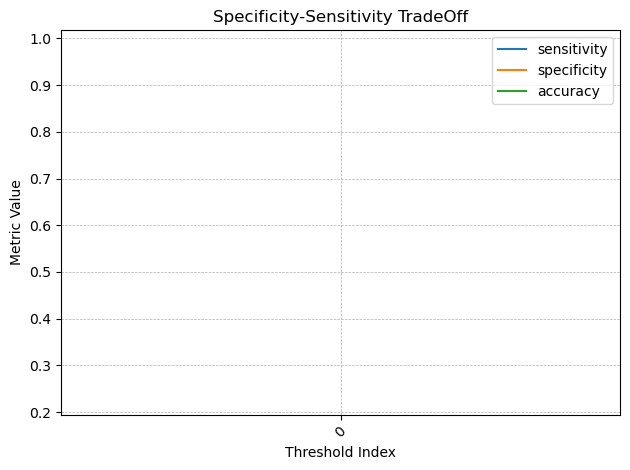

In [118]:
# Plot metrics_df
plt.figure(figsize=(24, 8))
metrics_df.plot(kind='line', grid=True)
plt.xticks(np.arange(0, len(metrics_df), 1), rotation=45)
plt.title('Specificity-Sensitivity TradeOff')
plt.xlabel('Threshold Index')
plt.ylabel('Metric Value')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Baseline Performance at Optimum Cutoff

In [119]:
optimum_cutoff = 0.49
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15880  3307]
 [  317  1503]]

Confusion Matrix for test: 
 [[1254 6977]
 [  15  758]]


In [120]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.827
Sensitivity / True Positive Rate / Recall : 0.826
Specificity / True Negative Rate :  0.828
Precision / Positive Predictive Value : 0.312
F1-score : 0.453


Test Performance : 

Accuracy : 0.223
Sensitivity / True Positive Rate / Recall : 0.981
Specificity / True Negative Rate :  0.152
Precision / Positive Predictive Value : 0.098
F1-score : 0.178


In [121]:
# ROC_AUC score 
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.891 

ROC AUC score for Test :  0.838


### Feature Selection using RFE

In [122]:
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(estimator=lr, n_features_to_select=15)
results = rfe.fit(X_train,y_train)
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [123]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
81,total_rech_num_6,1,True
62,std_ic_t2t_mou_8,1,True
35,std_og_t2f_mou_8,1,True
67,std_ic_t2f_mou_7,1,True
40,isd_og_mou_7,1,True
41,isd_og_mou_8,1,True
83,total_rech_num_8,1,True
89,last_day_rch_amt_8,1,True
61,std_ic_t2t_mou_7,1,True
92,monthly_2g_8,1,True


In [124]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['total_rech_num_6',
 'std_ic_t2t_mou_8',
 'std_og_t2f_mou_8',
 'std_ic_t2f_mou_7',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'std_ic_t2t_mou_7',
 'monthly_2g_8',
 'sachet_2g_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2m_mou_8',
 'std_og_t2f_mou_7',
 'loc_og_t2c_mou_6']

### Logistic Regression with RFE Selected Columns

**Model - 1**

In [125]:
# Logistic Regression Model with RFE columns

# Note that the SMOTE resampled Train set is used with statsmodels.api.GLM since it doesnot support class_weight
logr = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38358
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15988.
Date:                Sun, 14 Apr 2024   Deviance:                       31976.
Time:                        21:11:30   Pearson chi2:                 2.17e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4248
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4818      0.020    -24.308      0.000      -0.521      -0.443
total_rech_num_6       0.3403      0.018     19.013      0.000       0.305       0.375
std_ic_t2t_mou_8      -0.3680      0.025    -14.615      0.000      -0.417      -0.319
std_og_t2f_mou_8      -0.1809      0.025     -7.271      0.000      -0.230      -0.132
std_ic_t2f_mou_7       0.0498      0.018      2.786      0.005       0.015       0.085
isd_og_mou_7           0.0598      0.020      3.063      0.002       0.022       0.098
isd_og_mou_8           0.0476      0.019      2.530      0.011       0.011       0.084
total_rech_num_8      -0.8201      0.020    -41.316      0.000      -0.859      -0.781
last_day_rch_amt_8    -0.6932      0.019    -36.188      0.000      -0.731      -0.656
std_ic_t2t_mou_7       0.2200      0.021     10.362      0.000       0.178       0.262
monthly_2g_8          -0.9488      0.050    -18.943      0.000      -1.047      -0.851
sachet_2g_8           -0.4185      0.022    -18.844      0.000      -0.462      -0.375
loc_ic_t2f_mou_8      -0.4052      0.031    -13.168      0.000      -0.466      -0.345
loc_ic_t2m_mou_8      -1.4191      0.033    -42.403      0.000      -1.485      -1.354
std_og_t2f_mou_7       0.0407      0.021      1.933      0.053      -0.001       0.082
loc_og_t2c_mou_6      -0.0255      0.014     -1.760      0.078      -0.054       0.003
======================================================================================
"""

### Logistic Regression with Manual Feature Elimination

In [126]:
# Using P-value and vif for manual feature elimination


def vif(X_train_resampled, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train_resampled[selected_columns].values, i) for i in range(X_train_resampled[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train_resampled, logr_fit, rfe_selected_columns)

,VIF,P-value
Features,,
std_og_t2f_mou_7,1.84,0.0533
std_ic_t2t_mou_8,1.83,0.0000
std_og_t2f_mou_8,1.77,0.0000
std_ic_t2t_mou_7,1.76,0.0000
isd_og_mou_8,1.66,0.0114
isd_og_mou_7,1.63,0.0022
total_rech_num_8,1.42,0.0000
loc_ic_t2m_mou_8,1.36,0.0000
total_rech_num_6,1.28,0.0000


In [127]:
selected_columns = rfe_selected_columns
selected_columns.remove('std_og_t2f_mou_7')
selected_columns

['total_rech_num_6',
 'std_ic_t2t_mou_8',
 'std_og_t2f_mou_8',
 'std_ic_t2f_mou_7',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'std_ic_t2t_mou_7',
 'monthly_2g_8',
 'sachet_2g_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_og_t2c_mou_6']

**Model - 2**

In [128]:
logr2 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38359
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15990.
Date:                Sun, 14 Apr 2024   Deviance:                       31980.
Time:                        21:11:31   Pearson chi2:                 2.17e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4247
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4813      0.020    -24.291      0.000      -0.520      -0.442
total_rech_num_6       0.3391      0.018     18.959      0.000       0.304       0.374
std_ic_t2t_mou_8      -0.3691      0.025    -14.662      0.000      -0.418      -0.320
std_og_t2f_mou_8      -0.1557      0.021     -7.406      0.000      -0.197      -0.115
std_ic_t2f_mou_7       0.0574      0.017      3.299      0.001       0.023       0.092
isd_og_mou_7           0.0603      0.020      3.088      0.002       0.022       0.099
isd_og_mou_8           0.0471      0.019      2.501      0.012       0.010       0.084
total_rech_num_8      -0.8209      0.020    -41.357      0.000      -0.860      -0.782
last_day_rch_amt_8    -0.6933      0.019    -36.188      0.000      -0.731      -0.656
std_ic_t2t_mou_7       0.2216      0.021     10.443      0.000       0.180       0.263
monthly_2g_8          -0.9489      0.050    -18.949      0.000      -1.047      -0.851
sachet_2g_8           -0.4183      0.022    -18.840      0.000      -0.462      -0.375
loc_ic_t2f_mou_8      -0.4035      0.031    -13.142      0.000      -0.464      -0.343
loc_ic_t2m_mou_8      -1.4189      0.033    -42.403      0.000      -1.485      -1.353
loc_og_t2c_mou_6      -0.0254      0.014     -1.754      0.080      -0.054       0.003
======================================================================================
"""

In [129]:
# vif and p-values
vif(X_train_resampled, logr2_fit, selected_columns)

,VIF,P-value
Features,,
std_ic_t2t_mou_8,1.83,0.0000
std_ic_t2t_mou_7,1.76,0.0000
isd_og_mou_8,1.66,0.0124
isd_og_mou_7,1.63,0.0020
total_rech_num_8,1.42,0.0000
loc_ic_t2m_mou_8,1.36,0.0000
total_rech_num_6,1.28,0.0000
loc_ic_t2f_mou_8,1.24,0.0000
last_day_rch_amt_8,1.21,0.0000


In [130]:
selected_columns.remove('loc_og_t2c_mou_6')
selected_columns

['total_rech_num_6',
 'std_ic_t2t_mou_8',
 'std_og_t2f_mou_8',
 'std_ic_t2f_mou_7',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'std_ic_t2t_mou_7',
 'monthly_2g_8',
 'sachet_2g_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2m_mou_8']

**Model - 3**

In [131]:
logr3 = sm.GLM(y_train_resampled,(sm.add_constant(X_train_resampled[selected_columns])), family = sm.families.Binomial())
logr3_fit = logr3.fit()
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38360
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15991.
Date:                Sun, 14 Apr 2024   Deviance:                       31983.
Time:                        21:11:32   Pearson chi2:                 2.13e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4247
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4814      0.020    -24.291      0.000      -0.520      -0.443
total_rech_num_6       0.3354      0.018     18.891      0.000       0.301       0.370
std_ic_t2t_mou_8      -0.3683      0.025    -14.634      0.000      -0.418      -0.319
std_og_t2f_mou_8      -0.1556      0.021     -7.396      0.000      -0.197      -0.114
std_ic_t2f_mou_7       0.0571      0.017      3.281      0.001       0.023       0.091
isd_og_mou_7           0.0601      0.020      3.078      0.002       0.022       0.098
isd_og_mou_8           0.0471      0.019      2.505      0.012       0.010       0.084
total_rech_num_8      -0.8200      0.020    -41.328      0.000      -0.859      -0.781
last_day_rch_amt_8    -0.6930      0.019    -36.170      0.000      -0.731      -0.655
std_ic_t2t_mou_7       0.2209      0.021     10.409      0.000       0.179       0.262
monthly_2g_8          -0.9490      0.050    -18.951      0.000      -1.047      -0.851
sachet_2g_8           -0.4195      0.022    -18.894      0.000      -0.463      -0.376
loc_ic_t2f_mou_8      -0.4051      0.031    -13.189      0.000      -0.465      -0.345
loc_ic_t2m_mou_8      -1.4175      0.033    -42.381      0.000      -1.483      -1.352
======================================================================================
"""

In [132]:
# vif and p-values
vif(X_train_resampled, logr3_fit, selected_columns)

,VIF,P-value
Features,,
std_ic_t2t_mou_8,1.83,0.0000
std_ic_t2t_mou_7,1.76,0.0000
isd_og_mou_8,1.66,0.0122
isd_og_mou_7,1.63,0.0021
total_rech_num_8,1.41,0.0000
loc_ic_t2m_mou_8,1.36,0.0000
total_rech_num_6,1.26,0.0000
loc_ic_t2f_mou_8,1.24,0.0000
last_day_rch_amt_8,1.21,0.0000


- All features have low p-values(<0.05) and VIF (<5)
- This model could be used as the interpretable logistic regression model.

### Final Logistic Regression Model with RFE and Manual Elimination

In [133]:
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38374
Model:                            GLM   Df Residuals:                    38360
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15991.
Date:                Sun, 14 Apr 2024   Deviance:                       31983.
Time:                        21:11:33   Pearson chi2:                 2.13e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4247
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4814      0.020    -24.291      0.000      -0.520      -0.443
total_rech_num_6       0.3354      0.018     18.891      0.000       0.301       0.370
std_ic_t2t_mou_8      -0.3683      0.025    -14.634      0.000      -0.418      -0.319
std_og_t2f_mou_8      -0.1556      0.021     -7.396      0.000      -0.197      -0.114
std_ic_t2f_mou_7       0.0571      0.017      3.281      0.001       0.023       0.091
isd_og_mou_7           0.0601      0.020      3.078      0.002       0.022       0.098
isd_og_mou_8           0.0471      0.019      2.505      0.012       0.010       0.084
total_rech_num_8      -0.8200      0.020    -41.328      0.000      -0.859      -0.781
last_day_rch_amt_8    -0.6930      0.019    -36.170      0.000      -0.731      -0.655
std_ic_t2t_mou_7       0.2209      0.021     10.409      0.000       0.179       0.262
monthly_2g_8          -0.9490      0.050    -18.951      0.000      -1.047      -0.851
sachet_2g_8           -0.4195      0.022    -18.894      0.000      -0.463      -0.376
loc_ic_t2f_mou_8      -0.4051      0.031    -13.189      0.000      -0.465      -0.345
loc_ic_t2m_mou_8      -1.4175      0.033    -42.381      0.000      -1.483      -1.352
======================================================================================
"""

In [134]:
# Prediction 
y_train_pred_lr = logr3_fit.predict(sm.add_constant(X_train_resampled[selected_columns]))
y_train_pred_lr.head()

0    0.014656
1    0.180437
2    0.364418
3    0.351652
4    0.010208
dtype: float64

In [135]:
y_test_pred_lr = logr3_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

mobile_number
7002242818    0.000771
7000517161    0.924383
7002162382    0.126805
7002152271    0.277716
7002058655    0.149751
dtype: float64

## Performance
### Finding Optimum Probability Cutoff

In [136]:
# Specificity / Sensitivity Tradeoff 

# Classification at probability thresholds between 0 and 1 
y_train_pred_thres = pd.DataFrame(index=X_train_resampled.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [137]:
logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

for thres, column in zip(thresholds, y_train_pred_thres.columns.to_list()):
    confusion = confusion_matrix(y_train_resampled, y_train_pred_thres.loc[:, column])
    sensitivity, specificity, accuracy = model_metrics_thres(confusion)
    logr_metrics_df.loc[thres] = [sensitivity, specificity, accuracy]

logr_metrics_df.index = thresholds
logr_metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.500
0.1,0.975,0.405,0.690
0.2,0.951,0.526,0.738
0.3,0.923,0.616,0.769
0.4,0.887,0.706,0.796
0.5,0.845,0.789,0.817
0.6,0.787,0.855,0.821
0.7,0.712,0.911,0.811
0.8,0.596,0.955,0.775
0.9,0.179,0.992,0.586


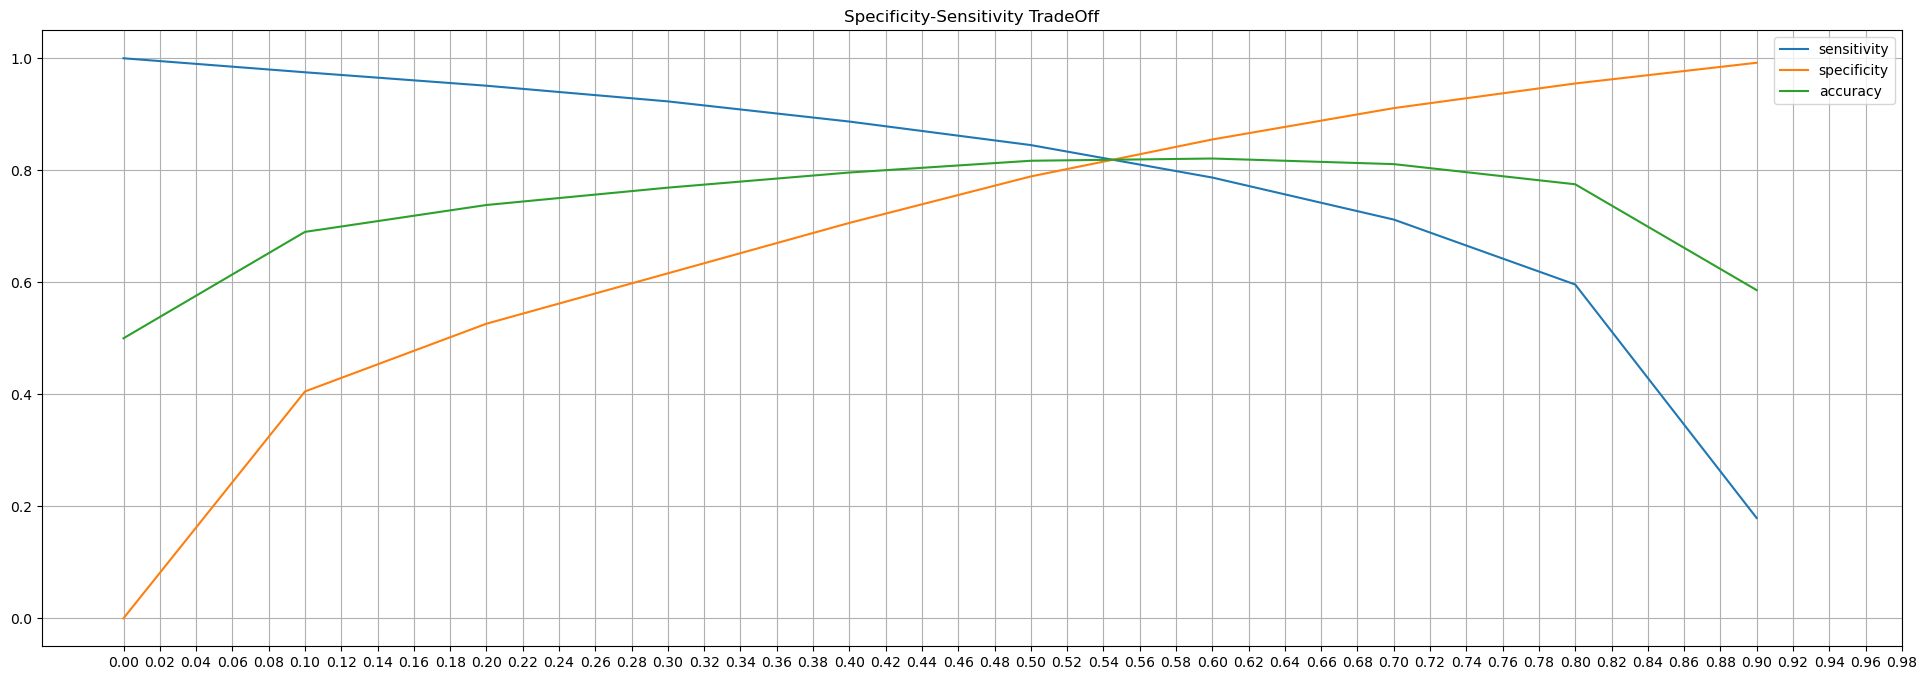

In [138]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

- The optimum probability cutoff for Logistic regression model is 0.542

In [139]:
optimum_cutoff = 0.542
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train_resampled, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15709  3478]
 [ 3417 15770]]

Confusion Matrix for test: 
 [[6773 1458]
 [ 171  602]]


In [140]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.82
Sensitivity / True Positive Rate / Recall : 0.822
Specificity / True Negative Rate :  0.819
Precision / Positive Predictive Value : 0.819
F1-score : 0.82


Test Performance : 

Accuracy : 0.819
Sensitivity / True Positive Rate / Recall : 0.779
Specificity / True Negative Rate :  0.823
Precision / Positive Predictive Value : 0.292
F1-score : 0.425


In [141]:
# ROC_AUC score 
print('ROC AUC score for Train : ',round(roc_auc_score(y_train_resampled, y_train_pred_lr),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred_lr),3) )

ROC AUC score for Train :  0.899 

ROC AUC score for Test :  0.866


## Model 1 : Logistic Regression

In [142]:
lr_summary_html = logr3_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



loc_ic_t2m_mou_8     -1.4175
monthly_2g_8         -0.9490
total_rech_num_8     -0.8200
last_day_rch_amt_8   -0.6930
const                -0.4814
sachet_2g_8          -0.4195
loc_ic_t2f_mou_8     -0.4051
std_ic_t2t_mou_8     -0.3683
total_rech_num_6      0.3354
std_ic_t2t_mou_7      0.2209
std_og_t2f_mou_8     -0.1556
isd_og_mou_7          0.0601
std_ic_t2f_mou_7      0.0571
isd_og_mou_8          0.0471
Name: coef, dtype: float64

- The above model could be used as the interpretable model for predicting telecom churn.

In [143]:
pca = PCA(random_state = 42) 
pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

array([[ 1.64887432e-01,  1.93987508e-01,  1.67239207e-01, ...,
         1.59713823e-03, -1.01492929e-02, -7.52949241e-03],
       [ 6.48592052e-02,  9.55966709e-02,  1.20775167e-01, ...,
         1.30383547e-02,  6.30773644e-02,  7.19547839e-02],
       [ 2.38415392e-01,  2.73645503e-01,  2.38436248e-01, ...,
        -1.84387842e-03,  1.36880331e-02,  1.47624047e-02],
       ...,
       [-1.21794624e-06, -3.73879970e-07, -5.93332669e-06, ...,
        -1.39800982e-06,  5.09087272e-07, -1.42479169e-06],
       [-0.00000000e+00, -1.25484432e-16,  6.87865611e-17, ...,
        -1.12958078e-19, -1.86162444e-17,  1.36916841e-17],
       [ 0.00000000e+00,  1.33230471e-17, -5.09127824e-17, ...,
        -9.61526642e-19, -5.60834054e-18, -2.41674786e-17]])

In [144]:
pca.explained_variance_ratio_

array([2.72067332e-01, 1.62438079e-01, 1.20827411e-01, 1.06069958e-01,
       9.11348492e-02, 4.77503953e-02, 2.63978386e-02, 2.56843719e-02,
       1.91789196e-02, 1.68045771e-02, 1.55523315e-02, 1.31676508e-02,
       1.04552035e-02, 7.72969666e-03, 7.22746157e-03, 6.14494245e-03,
       5.62073302e-03, 5.44580678e-03, 4.59009553e-03, 4.38487762e-03,
       3.46703294e-03, 3.27941184e-03, 2.78099417e-03, 2.13444069e-03,
       2.07541852e-03, 1.89794550e-03, 1.41384540e-03, 1.30240634e-03,
       1.15369645e-03, 1.05262393e-03, 9.64292635e-04, 9.16685591e-04,
       8.84066449e-04, 7.62965869e-04, 6.61794133e-04, 5.69666681e-04,
       5.12585122e-04, 5.04440782e-04, 4.82396197e-04, 4.46889123e-04,
       4.36440895e-04, 4.10389103e-04, 3.51844567e-04, 3.12625898e-04,
       2.51672891e-04, 2.34723734e-04, 1.96949915e-04, 1.71296677e-04,
       1.59882665e-04, 1.48331194e-04, 1.45919651e-04, 1.08583617e-04,
       1.04038757e-04, 8.90621545e-05, 8.53008916e-05, 7.60704268e-05,
      

**Scree Plot**

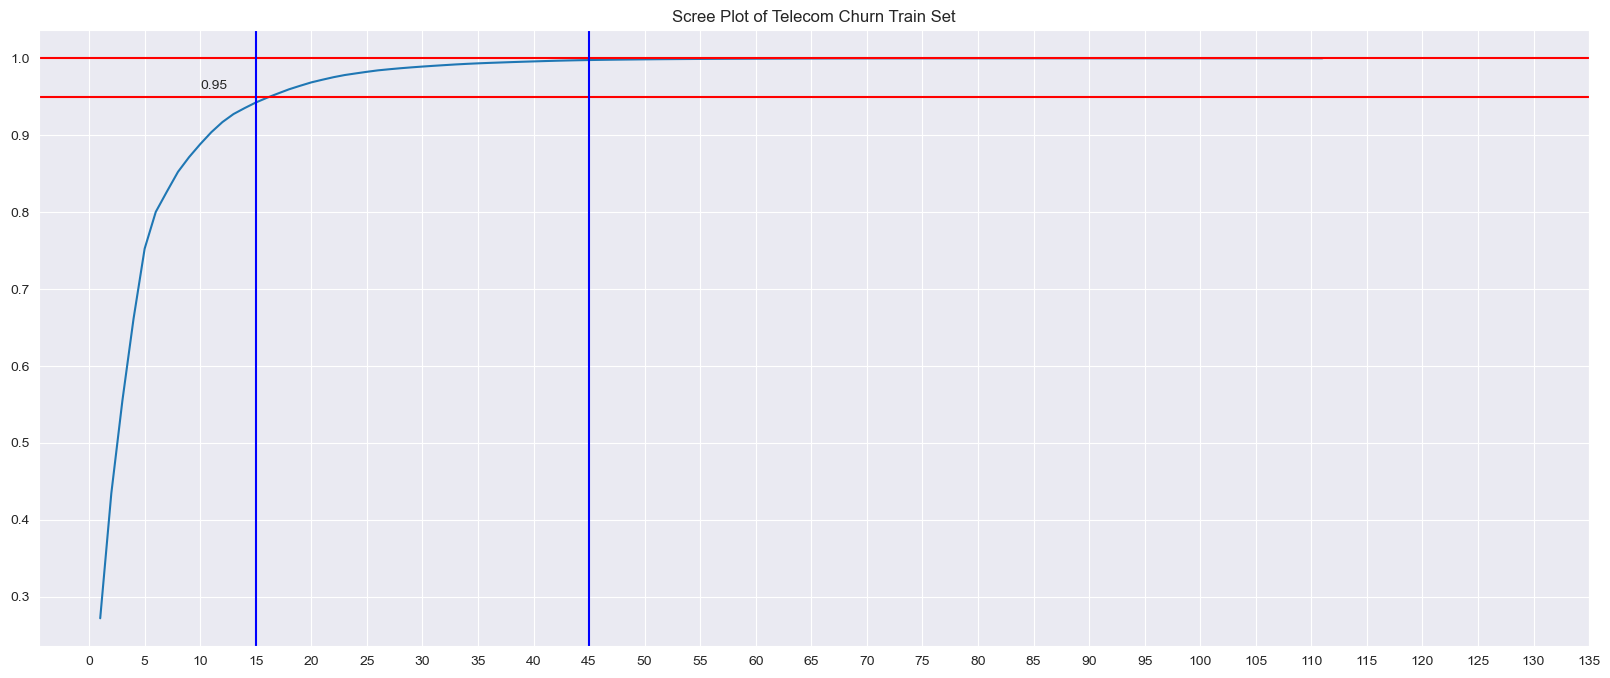

In [145]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20, 8))
sns.set_style('darkgrid')
sns.lineplot(x=np.arange(1, len(var_cum) + 1), y=var_cum)
plt.xticks(np.arange(0, 140, 5))
plt.axhline(0.95, color='r')
plt.axhline(1.0, color='r')
plt.axvline(15, color='b')
plt.axvline(45, color='b')
plt.text(10, 0.96, '0.95')
plt.title('Scree Plot of Telecom Churn Train Set')
plt.show()


- From the above scree plot, it is clear that 95% of variance in the train set can be explained by first 16 principal components and 100% of variance is explained by the first 45 principal components.

In [146]:
# Perform PCA using the first 45 components
pca_final = PCA(n_components=45, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000166926,-907.572091,-342.923473,13.094524,58.813687,-95.616170,-1050.535113,254.649035,-31.445113,305.140178,-216.814495,95.824798,231.408393,-111.002807,-2.007157,444.977551,31.542248,573.815543,-278.572020,30.768300,-36.915343,-0.293864,-83.574163,-13.958611,-60.930686,-53.209137,56.050039,-17.778923,-12.624232,14.149467,-30.559304,26.064676,-1.081061,-19.813660,-3.293366,-2.723538,7.468580,22.691606,28.697321,-14.306737,4.968448,-8.652124,2.455573,17.046290,-21.829348,-8.170413,0
7001343085,573.898069,-902.385626,-424.839154,-331.153284,-148.986985,-36.955686,-134.445190,265.325249,-92.070842,-164.203294,25.105279,-36.980871,164.785673,-222.908729,-12.574007,-50.569984,-44.772155,-62.984751,-18.100882,-86.239523,-115.399020,-45.776123,16.346485,-21.497241,-10.541414,-71.753851,29.228785,-20.879852,-0.689059,3.221071,-21.222807,65.500197,-39.718581,50.423117,10.585237,43.054203,0.207123,-66.104956,13.584475,25.817618,52.037622,-3.275051,8.493340,19.428627,-38.788600,0
7001863283,-1538.198420,514.032750,846.865479,57.032326,-1126.228629,-84.209338,-44.422367,-88.158996,-58.410605,50.519501,3.053289,-229.101661,-109.215994,-3.253689,7.045433,-85.645675,54.533534,-52.296200,20.978750,-90.806618,96.348922,24.280151,-52.425784,42.430204,-40.627590,-12.715499,-4.334686,-4.092299,50.340687,-0.777648,-35.147731,-121.580978,98.867726,-34.067125,-8.936179,22.923119,1.667280,52.645849,-8.547902,9.088433,-18.401087,3.679056,26.075838,27.270303,19.645744,0
7002275981,486.830773,-224.929645,1130.460521,-496.188989,6.009206,81.106783,-148.667442,170.280719,-7.374621,-99.556476,-159.658844,-14.187344,-98.682649,213.233855,-34.920516,-17.212555,29.644609,4.939794,2.799453,-49.581017,-88.567692,16.809713,-9.470953,4.383606,29.532085,38.211930,32.464254,-5.316355,-60.148569,12.592940,20.988319,80.709632,-50.972057,-3.712760,64.999516,-57.837401,-8.308860,-5.928999,-5.053466,-5.655870,-12.104090,-14.712245,-32.273619,12.587807,-20.322048,0
7001086221,-1420.949336,794.071940,99.221349,155.118570,145.349506,784.723341,-10.947472,609.724203,-172.481650,-42.795734,59.174499,-162.913695,-112.219720,-55.108265,17.302914,-152.112702,-611.920520,181.608043,-211.358030,-77.180316,116.282206,83.488460,-26.254908,128.489709,-69.085145,4.854666,-128.279252,44.327971,-6.471120,-28.781989,14.618215,-31.359922,27.329852,-25.949189,8.942319,-34.842775,-21.934004,17.940607,-0.864313,-19.437919,-5.321172,6.332964,-11.350727,41.881686,-8.203611,0


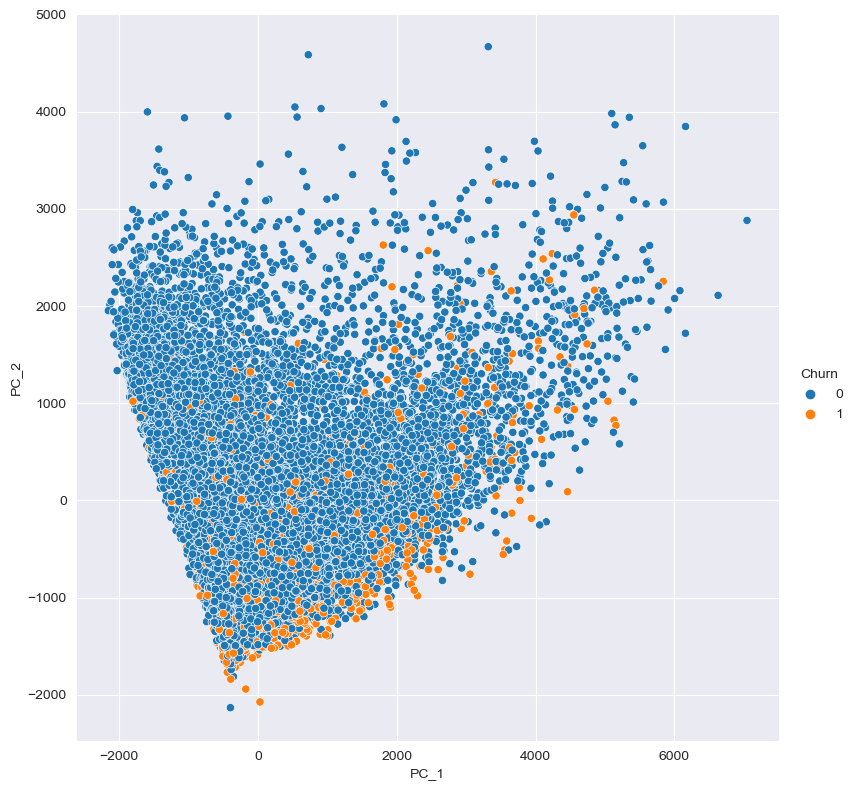

In [147]:
## Plotting principal components 
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Churn", size=8);

## Model 2 : PCA + Logistic Regression Model

In [148]:
# X,y Split
y_train_pca = data_train_pca.pop('Churn')
X_train_pca = data_train_pca

# Transforming test set with pca ( 45 components)
X_test_pca = pca_final.transform(X_test)

# Logistic Regression
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

LogisticRegression(class_weight='balanced', random_state=100)

In [149]:
# y_train predictions
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [150]:
# Test Prediction
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([1, 1, 1, 1, 1], dtype=int64)

**Baseline Performance**

In [151]:
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.615
Sensitivity / True Positive Rate / Recall : 0.92
Specificity / True Negative Rate :  0.586
Precision / Positive Predictive Value : 0.174
F1-score : 0.293

Test Performance :

Accuracy : 0.086
Sensitivity / True Positive Rate / Recall : 1.0
Specificity / True Negative Rate :  0.0
Precision / Positive Predictive Value : 0.086
F1-score : 0.158


**Hyperparameter Tuning**

In [152]:
# Creating a Logistic regression model using pca transformed train set
lr_pca = LogisticRegression(random_state=100, class_weight='balanced')

In [153]:
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=100)

search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
search.fit(X_train_pca, y_train_pca)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [154]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', search.best_score_)
print('Best Parameters :', search.best_params_)

Best ROC-AUC score : 0.8750836773888739
Best Parameters : {'C': 50, 'penalty': 'l2'}


In [155]:
# Modelling using the best LR-PCA estimator 
lr_pca_best = search.best_estimator_
lr_pca_best_fit = lr_pca_best.fit(X_train_pca, y_train_pca)

# Prediction on Train set
y_train_pred_lr_pca_best = lr_pca_best_fit.predict(X_train_pca)
y_train_pred_lr_pca_best[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [156]:
# Prediction on test set
y_test_pred_lr_pca_best = lr_pca_best_fit.predict(X_test_pca)
y_test_pred_lr_pca_best[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [157]:
## Model Performance after Hyper Parameter Tuning

train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca_best)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.641
Sensitivity / True Positive Rate / Recall : 0.907
Specificity / True Negative Rate :  0.616
Precision / Positive Predictive Value : 0.183
F1-score : 0.305

Test Performance :

Accuracy : 0.086
Sensitivity / True Positive Rate / Recall : 1.0
Specificity / True Negative Rate :  0.0
Precision / Positive Predictive Value : 0.086
F1-score : 0.158


## Model 3 : PCA + Random Forest

In [158]:
# creating a random forest classifier using pca output

pca_rf = RandomForestClassifier(random_state=42, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.08640165272733331,
                                     1: 0.9135983472726666},
                       n_jobs=-1, oob_score=True, random_state=42, verbose=1)

In [159]:
# Hyper parameter Tuning
params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.08640165272733331,
                                                            1: 0.9135983472726666},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [160]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best ROC-AUC score : 0.8861641751997535
Best Parameters : {'max_depth': 7, 'min_samples_leaf': 20, 'n_estimators': 100}


In [161]:
# Modelling using the best PCA-RandomForest Estimator 
pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:5]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0], dtype=int64)

In [162]:
# Prediction on test set
y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:5]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 0, 0], dtype=int64)

In [163]:
## PCA - RandomForest Model Performance - Hyper Parameter Tuned

train_matrix = confusion_matrix(y_train, y_train_pred_pca_rf_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_rf_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.881
Sensitivity / True Positive Rate / Recall : 0.818
Specificity / True Negative Rate :  0.887
Precision / Positive Predictive Value : 0.408
F1-score : 0.544

Test Performance :

Accuracy : 0.914
Sensitivity / True Positive Rate / Recall : 0.0
Specificity / True Negative Rate :  1.0
Precision / Positive Predictive Value : nan
F1-score : nan


In [164]:
## out of bag error 
pca_rf_best_fit.oob_score_

0.8665206835816632

## Model 4 : PCA + XGBoost

In [165]:
pca_xgb = xgb.XGBClassifier(random_state=42, scale_pos_weight= class_0/class_1 ,
                                    tree_method='hist', 
                                   objective='binary:logistic',
                                  
                                  
                                  )  # scale_pos_weight takes care of class imbalance
pca_xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [166]:
print('Baseline Train AUC Score')
roc_auc_score(y_train, pca_xgb.predict_proba(X_train_pca)[:, 1])

Baseline Train AUC Score


0.9999934994905548

In [167]:
print('Baseline Test AUC Score')
roc_auc_score(y_test, pca_xgb.predict_proba(X_test_pca)[:, 1])

Baseline Test AUC Score


0.5482851800445827

In [168]:
## Hyper parameter Tuning
parameters = {
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma' : [10,20,50],
              'max_depth': [2,3,4],
              'min_child_weight': [25,50],
              'n_estimators': [150,200,500]}
pca_xgb_search = GridSearchCV(estimator=pca_xgb , param_grid=parameters,scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1)
pca_xgb_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 162 candidates, totalling 648 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'gamma': [10, 20, 50],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'min_child_weight': [25, 50],
                         'n_estimators': [150, 200, 500]},
             scoring='roc_auc', verbose=1)

In [169]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_xgb_search.best_score_)
print('Best Parameters :', pca_xgb_search.best_params_)

Best ROC-AUC score : 0.8957739568143289
Best Parameters : {'gamma': 10, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 50, 'n_estimators': 150}


In [170]:
# Modelling using the best PCA-XGBoost Estimator 
pca_xgb_best = pca_xgb_search.best_estimator_
pca_xgb_best_fit = pca_xgb_best.fit(X_train_pca, y_train)

# Prediction on Train set
y_train_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_train_pca)
y_train_pred_pca_xgb_best[:5]

array([0, 0, 0, 0, 0])

In [171]:
X_train_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000166926,-907.572091,-342.923473,13.094524,58.813687,-95.616170,-1050.535113,254.649035,-31.445113,305.140178,-216.814495,95.824798,231.408393,-111.002807,-2.007157,444.977551,31.542248,573.815543,-278.572020,30.768300,-36.915343,-0.293864,-83.574163,-13.958611,-60.930686,-53.209137,56.050039,-17.778923,-12.624232,14.149467,-30.559304,26.064676,-1.081061,-19.813660,-3.293366,-2.723538,7.468580,22.691606,28.697321,-14.306737,4.968448,-8.652124,2.455573,17.046290,-21.829348,-8.170413
7001343085,573.898069,-902.385626,-424.839154,-331.153284,-148.986985,-36.955686,-134.445190,265.325249,-92.070842,-164.203294,25.105279,-36.980871,164.785673,-222.908729,-12.574007,-50.569984,-44.772155,-62.984751,-18.100882,-86.239523,-115.399020,-45.776123,16.346485,-21.497241,-10.541414,-71.753851,29.228785,-20.879852,-0.689059,3.221071,-21.222807,65.500197,-39.718581,50.423117,10.585237,43.054203,0.207123,-66.104956,13.584475,25.817618,52.037622,-3.275051,8.493340,19.428627,-38.788600
7001863283,-1538.198420,514.032750,846.865479,57.032326,-1126.228629,-84.209338,-44.422367,-88.158996,-58.410605,50.519501,3.053289,-229.101661,-109.215994,-3.253689,7.045433,-85.645675,54.533534,-52.296200,20.978750,-90.806618,96.348922,24.280151,-52.425784,42.430204,-40.627590,-12.715499,-4.334686,-4.092299,50.340687,-0.777648,-35.147731,-121.580978,98.867726,-34.067125,-8.936179,22.923119,1.667280,52.645849,-8.547902,9.088433,-18.401087,3.679056,26.075838,27.270303,19.645744
7002275981,486.830773,-224.929645,1130.460521,-496.188989,6.009206,81.106783,-148.667442,170.280719,-7.374621,-99.556476,-159.658844,-14.187344,-98.682649,213.233855,-34.920516,-17.212555,29.644609,4.939794,2.799453,-49.581017,-88.567692,16.809713,-9.470953,4.383606,29.532085,38.211930,32.464254,-5.316355,-60.148569,12.592940,20.988319,80.709632,-50.972057,-3.712760,64.999516,-57.837401,-8.308860,-5.928999,-5.053466,-5.655870,-12.104090,-14.712245,-32.273619,12.587807,-20.322048
7001086221,-1420.949336,794.071940,99.221349,155.118570,145.349506,784.723341,-10.947472,609.724203,-172.481650,-42.795734,59.174499,-162.913695,-112.219720,-55.108265,17.302914,-152.112702,-611.920520,181.608043,-211.358030,-77.180316,116.282206,83.488460,-26.254908,128.489709,-69.085145,4.854666,-128.279252,44.327971,-6.471120,-28.781989,14.618215,-31.359922,27.329852,-25.949189,8.942319,-34.842775,-21.934004,17.940607,-0.864313,-19.437919,-5.321172,6.332964,-11.350727,41.881686,-8.203611


In [172]:
# Prediction on test set
X_test_pca = pca_final.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index, columns = X_train_pca.columns)
y_test_pred_pca_xgb_best = pca_xgb_best_fit.predict(X_test_pca)
y_test_pred_pca_xgb_best[:5]

array([0, 0, 0, 0, 0])

In [173]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance

train_matrix = confusion_matrix(y_train, y_train_pred_pca_xgb_best)
test_matrix = confusion_matrix(y_test, y_test_pred_pca_xgb_best)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.886
Sensitivity / True Positive Rate / Recall : 0.909
Specificity / True Negative Rate :  0.884
Precision / Positive Predictive Value : 0.427
F1-score : 0.581

Test Performance :

Accuracy : 0.888
Sensitivity / True Positive Rate / Recall : 0.021
Specificity / True Negative Rate :  0.969
Precision / Positive Predictive Value : 0.059
F1-score : 0.031


In [174]:
## PCA - XGBOOST [Hyper parameter tuned] Model Performance
print('Train AUC Score')
print(roc_auc_score(y_train, pca_xgb_best.predict_proba(X_train_pca)[:, 1]))
print('Test AUC Score')
print(roc_auc_score(y_test, pca_xgb_best.predict_proba(X_test_pca)[:, 1]))

Train AUC Score
0.9609383241973017
Test AUC Score
0.5221853991858313


### Recommendations

In [175]:
print('Most Important Predictors of churn , in the order of importance are : ')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most Important Predictors of churn , in the order of importance are : 


loc_ic_t2m_mou_8     -1.4175
monthly_2g_8         -0.9490
total_rech_num_8     -0.8200
last_day_rch_amt_8   -0.6930
const                -0.4814
sachet_2g_8          -0.4195
loc_ic_t2f_mou_8     -0.4051
std_ic_t2t_mou_8     -0.3683
total_rech_num_6      0.3354
std_ic_t2t_mou_7      0.2209
std_og_t2f_mou_8     -0.1556
isd_og_mou_7          0.0601
std_ic_t2f_mou_7      0.0571
isd_og_mou_8          0.0471
Name: coef, dtype: float64

### Strongest Indicators of Churn

1. **Average Monthly Local Incoming Calls from Fixed Line:**
   - Customers who churn exhibit a lower average monthly local incoming calls from fixed line in the action period by 1.27 standard deviations compared to users who don't churn, holding all other factors constant. This is the strongest indicator of churn.

2. **Number of Recharges Done in Action Period:**
   - Customers who churn show a lower number of recharges done in the action period by 1.20 standard deviations compared to users who don't churn, when all other factors are held constant. This is the second strongest indicator of churn.

3. **Recharge Amount:**
   - Furthermore, customers who churn have done 0.6 standard deviations higher recharge than non-churn customers. This factor, coupled with the above factors, is a good indicator of churn.

4. **Usage of Monthly 2G/3G Packages:**
   - Customers who churn are more likely to be users of 'monthly 2G package-0 / monthly 3G package-0' in the action period, approximately 0.3 standard deviations higher than other packages, when all other factors are held constant.

## Recommendations to the Telecom Company

1. **Focus on Users with Lower Than Average Incoming Calls:**
   - Concentrate on users with 1.27 standard deviations lower than the average incoming calls from fixed line. They are most likely to churn.

2. **Target Users with Fewer Recharges:**
   - Concentrate on users who recharge less frequently (less than 1.2 standard deviations compared to the average) in the 8th month. They are the second most likely to churn.

3. **Use Models with High Sensitivity:**
   - Models with high sensitivity are the best for predicting churn. Utilize the PCA + Logistic Regression model, which has an ROC score of 0.87 and a test sensitivity of 100%.

